In [1]:
import sys
print(sys.version)
import seaborn as sns
import statistics as st
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import math as m
from scipy.stats import shapiro
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import operator
from fitter import Fitter, get_common_distributions, get_distributions
colors = ['thistle','lightblue','lightgreen','yellow','pink']
import joypy

3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]


In [2]:
import csv


data_len = pd.read_csv('DataBackup/Backup-TX/length.csv',usecols=['90', '70', '40', '30', '20'],sep=';')

l90 = data_len['90']
l70 = data_len['70']
l40 = data_len['40']
l30 = data_len['30']
l20 = data_len['20']

data_len.columns = ['90', '70', '40', '30', '20']

# anova test
alpha = 0.05
fvalue, pvalue = stats.f_oneway(data_len['90'],data_len['70'],data_len['40'],data_len['30'],data_len['20'])
print('ANOVA - ONE WAY TEST')
if pvalue > alpha:
    print('The mean of all distributions is similar (fail to reject H0)')
else:
    print('The mean of all distributions is considerably different (reject H0)')

# kruskal
ff ,pp = stats.kruskal(data_len['90'],data_len['70'],data_len['40'],data_len['30'],data_len['20'])

print('KRUSKAL TEST')
if pp > alpha:
    print('The mean of all distributions is similar (fail to reject H0)')
else:
    print('The mean of all distributions is considerably different (reject H0)')

ANOVA - ONE WAY TEST
The mean of all distributions is considerably different (reject H0)
KRUSKAL TEST
The mean of all distributions is considerably different (reject H0)


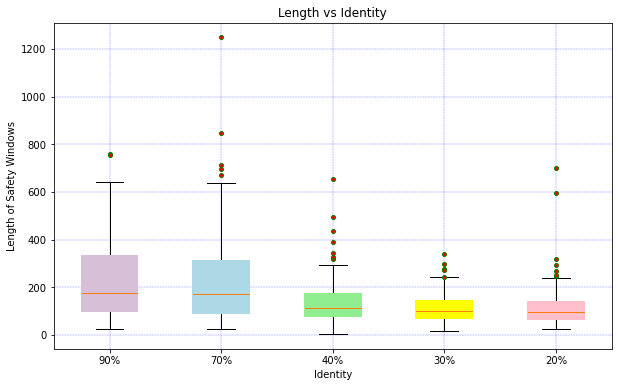

In [3]:
fig= plt.figure(figsize=(10,6))

flierprops = dict(marker='.', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='g')
box_len = plt.boxplot(data_len,patch_artist=True,flierprops=flierprops)


plt.xticks([1, 2, 3,4,5], ['90%', '70%', '40%','30%','20%'])
plt.xlabel('Identity')
plt.ylabel('Length of Safety Windows')
plt.title('Length vs Identity')
plt.grid(color='b', ls = '-.', lw = 0.25)

for i in range(0,len(box_len['boxes'])):
    box_len['boxes'][i].set(color = colors[i],linewidth=2)
    box_len['boxes'][i].set_facecolor(colors[i])
    
fig.savefig('Boxplot_length_tx.png')


Statistics=0.899, p=0.000
Sample does not look Gaussian (reject H0)


<AxesSubplot:>

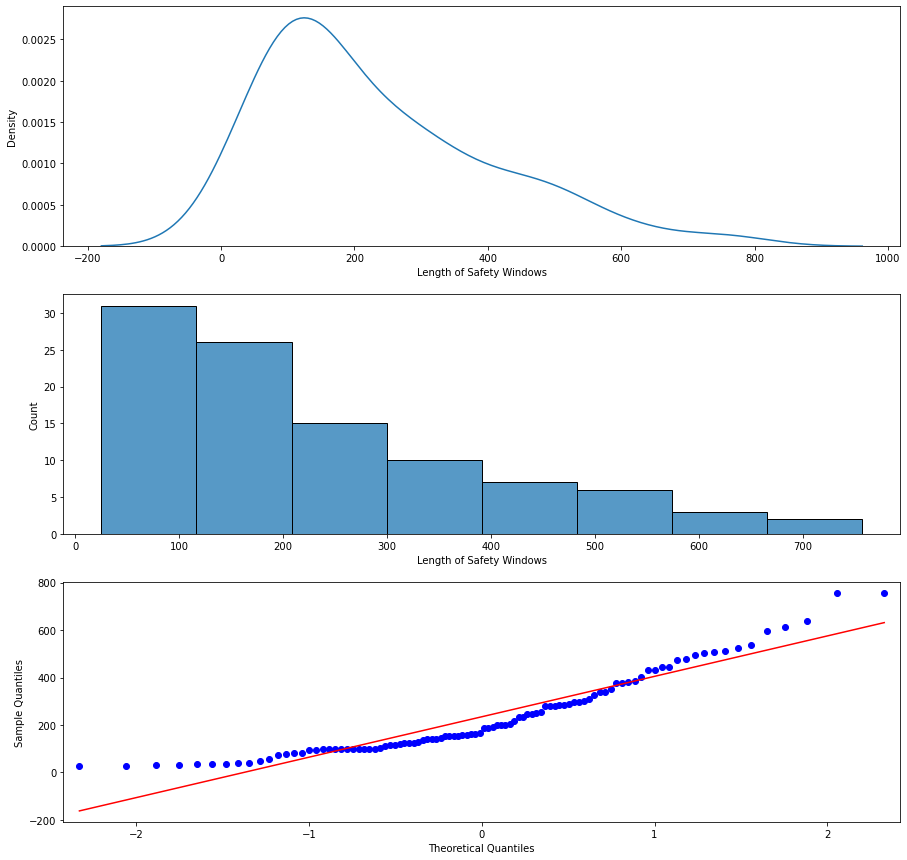

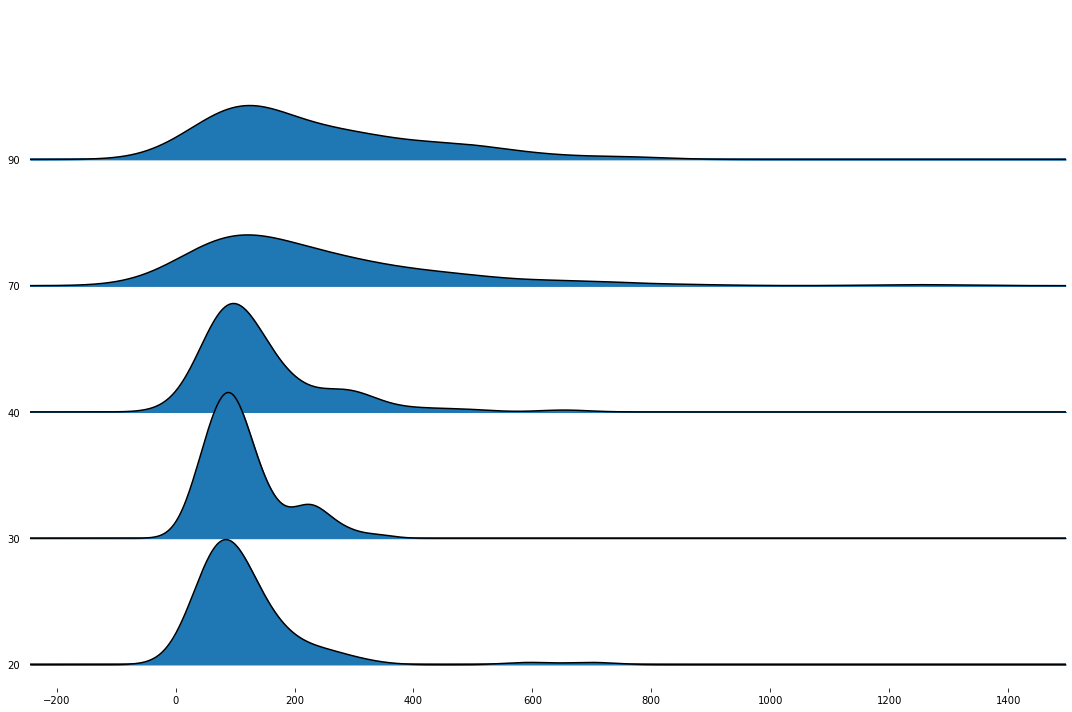

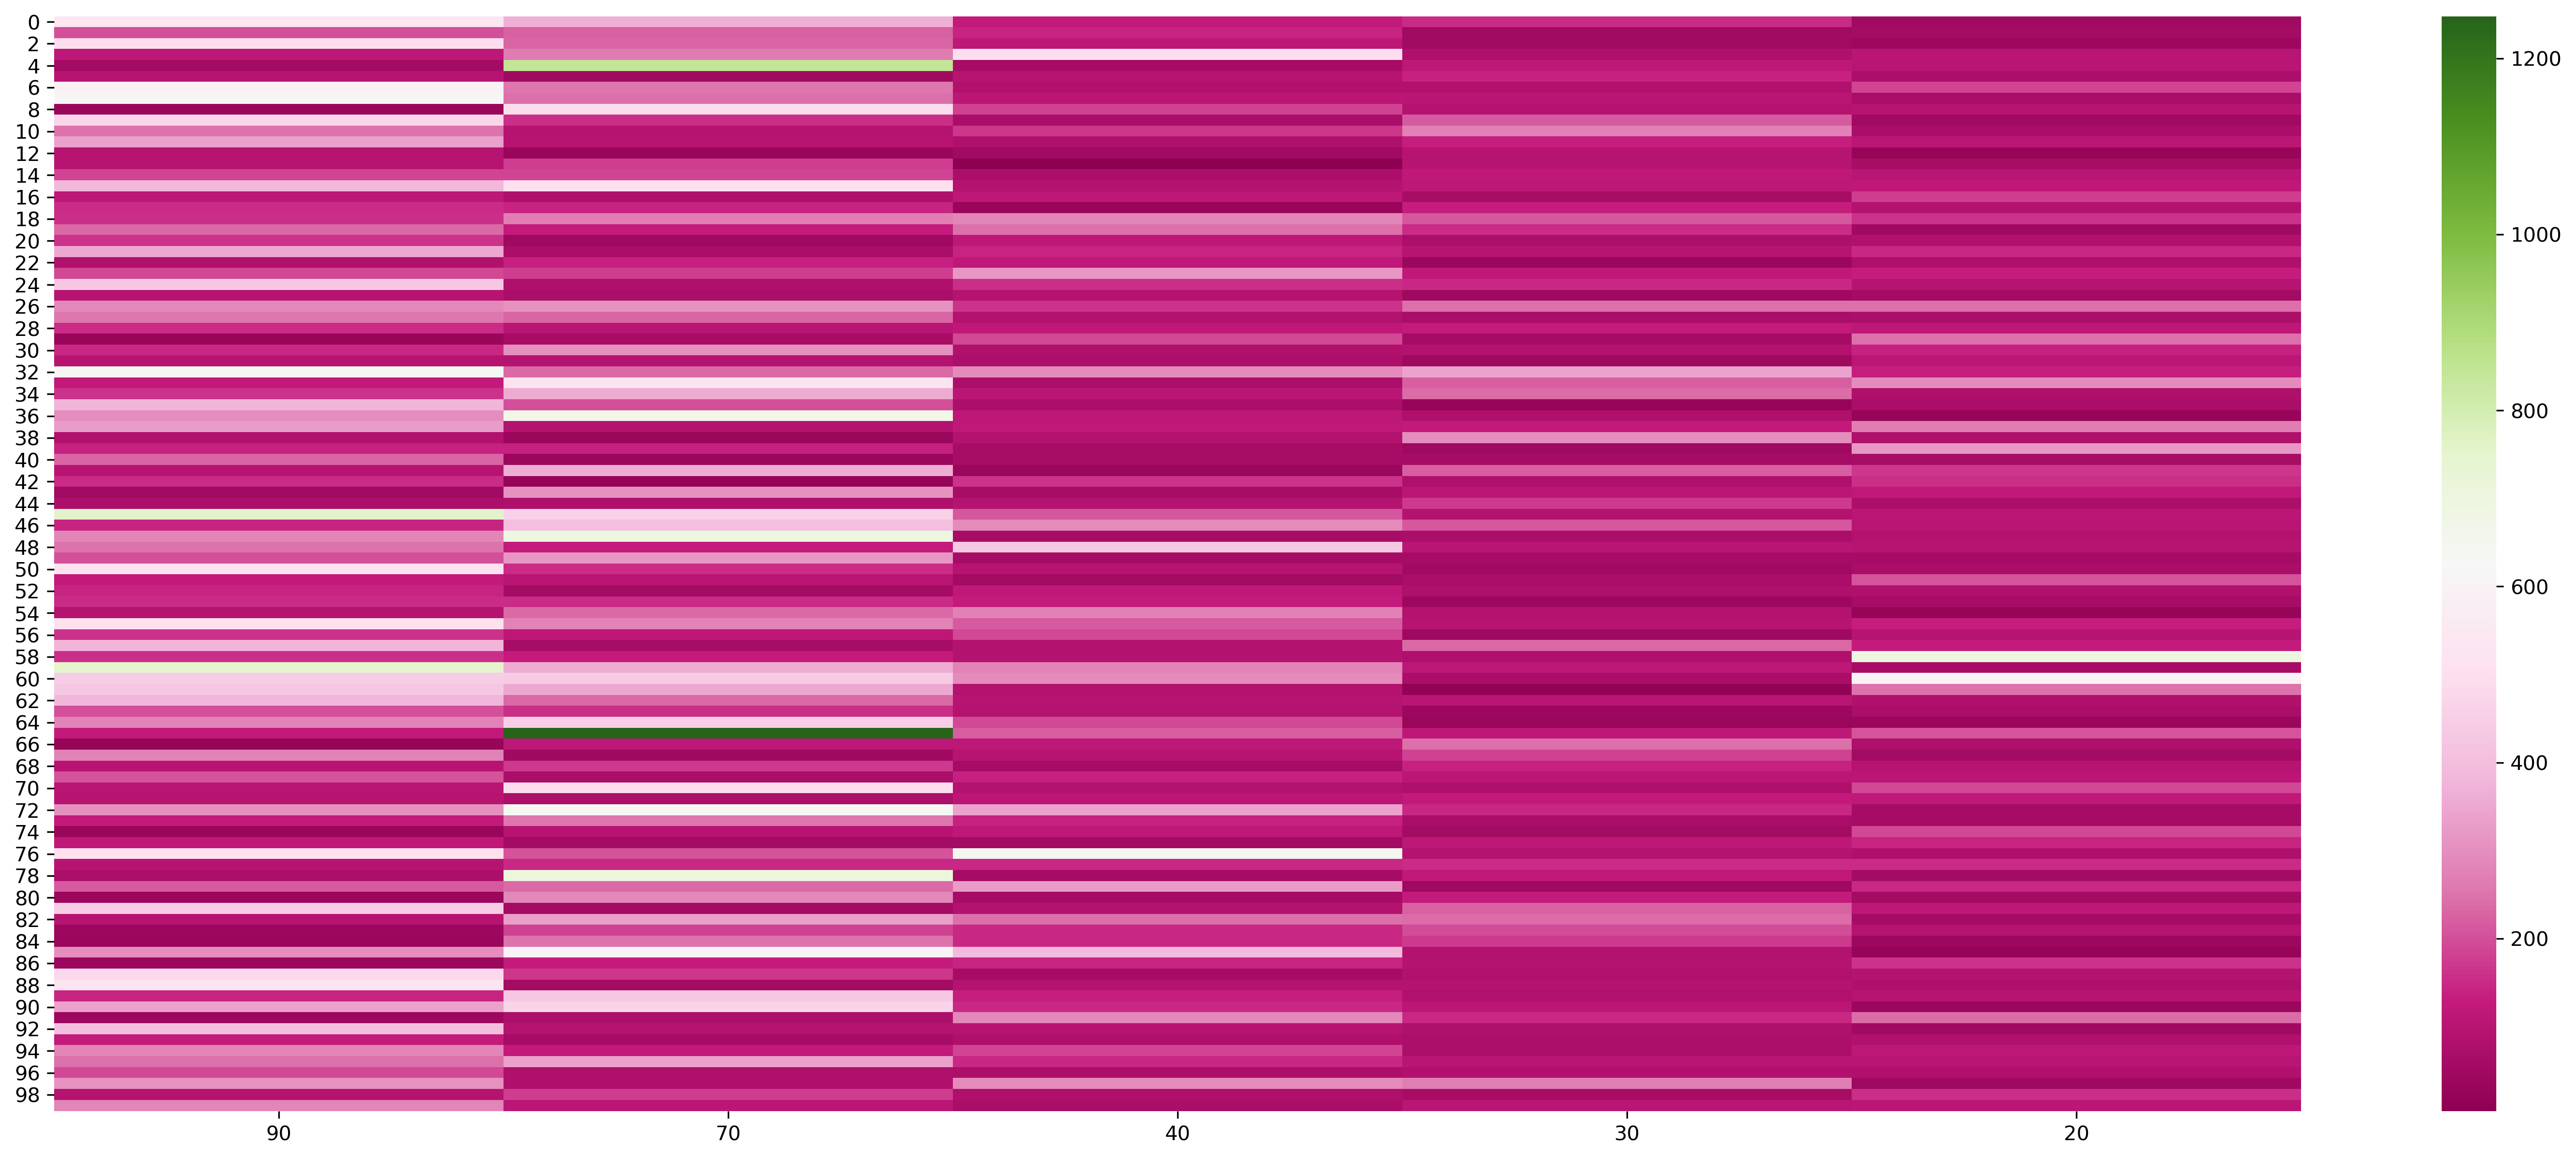

In [4]:
import seaborn as sns

#sns.set_theme()
fig, ax =plt.subplots(3,1,figsize=(15,15))
sns.kdeplot(l90,ax=ax[0])
ax[0].set(xlabel='Length of Safety Windows')
sns.histplot(l90,ax=ax[1])
ax[1].set(xlabel='Length of Safety Windows')
qqplot(l90, line='s',ax=ax[2])

# shapiro test
stat, p = shapiro(l90)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# fitting distribution
f = Fitter(l90,distributions=['laplace_asymmetric'])
f.fit()
#f.get_best(method = 'sumsquare_error')
[kappa,loc,scale] = f.fitted_param['laplace_asymmetric']
#f.summary()

# joy plots
joypy.joyplot(data_len,xlim="own",figsize=(15, 10))

# hitmaps
fig = plt.figure(figsize=(25, 10), dpi=300)
sns.heatmap(data_len,cmap="PiYG")

In [5]:
import csv

data_cov = pd.read_csv('DataBackup/Backup-TX/coverage.csv',usecols=['90', '70', '40', '30', '20'],sep=';')

l90 = data_cov['90']
l70 = data_cov['70']
l40 = data_cov['40']
l30 = data_cov['30']
l20 = data_cov['20']

data_cov.columns = ['90', '70', '40', '30', '20']

# anova test
alpha = 0.05
fvalue, pvalue = stats.f_oneway(data_cov['90'],data_cov['70'],data_cov['40'],data_cov['30'],data_cov['20'])
print('ANOVA - ONE WAY TEST')
if pvalue > alpha:
    print('The mean of all distributions is similar (fail to reject H0)')
else:
    print('The mean of all distributions is considerably different (reject H0)')

# kruskal
ff ,pp = stats.kruskal(data_cov['90'],data_cov['70'],data_cov['40'],data_cov['30'],data_cov['20'])

print('KRUSKAL TEST')
if pp > alpha:
    print('The mean of all distributions is similar (fail to reject H0)')
else:
    print('The mean of all distributions is considerably different (reject H0)')

ANOVA - ONE WAY TEST
The mean of all distributions is considerably different (reject H0)
KRUSKAL TEST
The mean of all distributions is considerably different (reject H0)


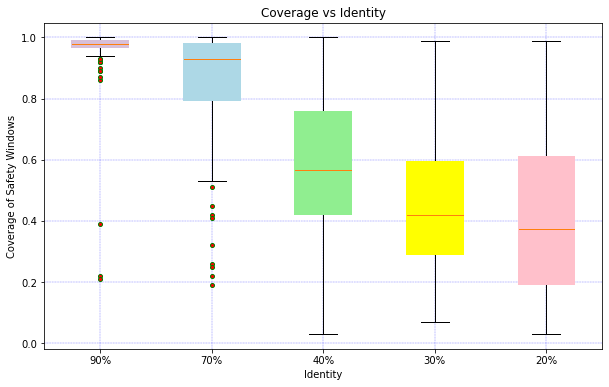

In [6]:
fig= plt.figure(figsize=(10,6))

flierprops = dict(marker='.', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='g')
box_len = plt.boxplot(data_cov,patch_artist=True,flierprops=flierprops)


plt.xticks([1, 2, 3,4,5], ['90%', '70%', '40%','30%','20%'])
plt.xlabel('Identity')
plt.ylabel('Coverage of Safety Windows')
plt.title('Coverage vs Identity')
plt.grid(color='b', ls = '-.', lw = 0.25)


for i in range(0,len(box_len['boxes'])):
    box_len['boxes'][i].set(color = colors[i],linewidth=2)
    box_len['boxes'][i].set_facecolor(colors[i])
    
fig.savefig('Boxplot_coverage_tx.png')

Statistics=0.324, p=0.000
Sample does not look Gaussian (reject H0)


<AxesSubplot:>

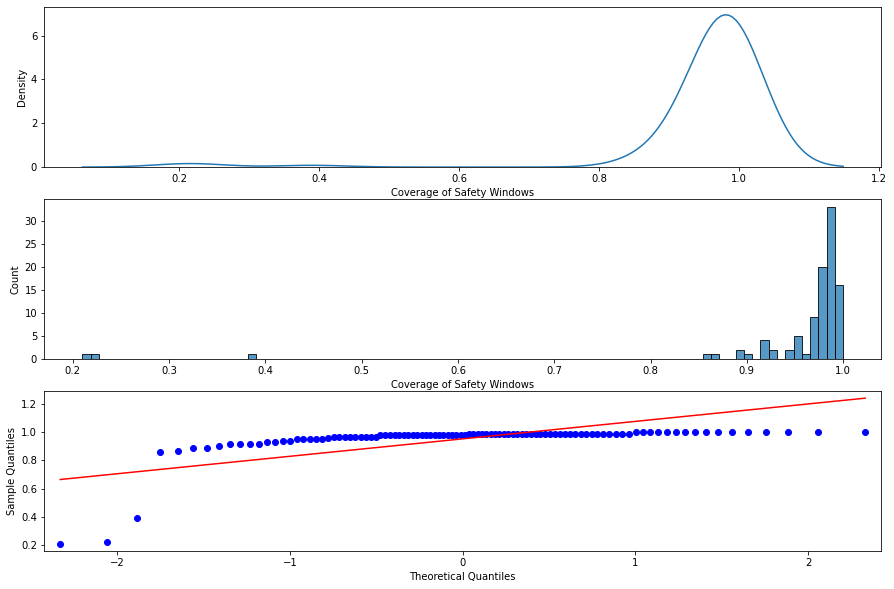

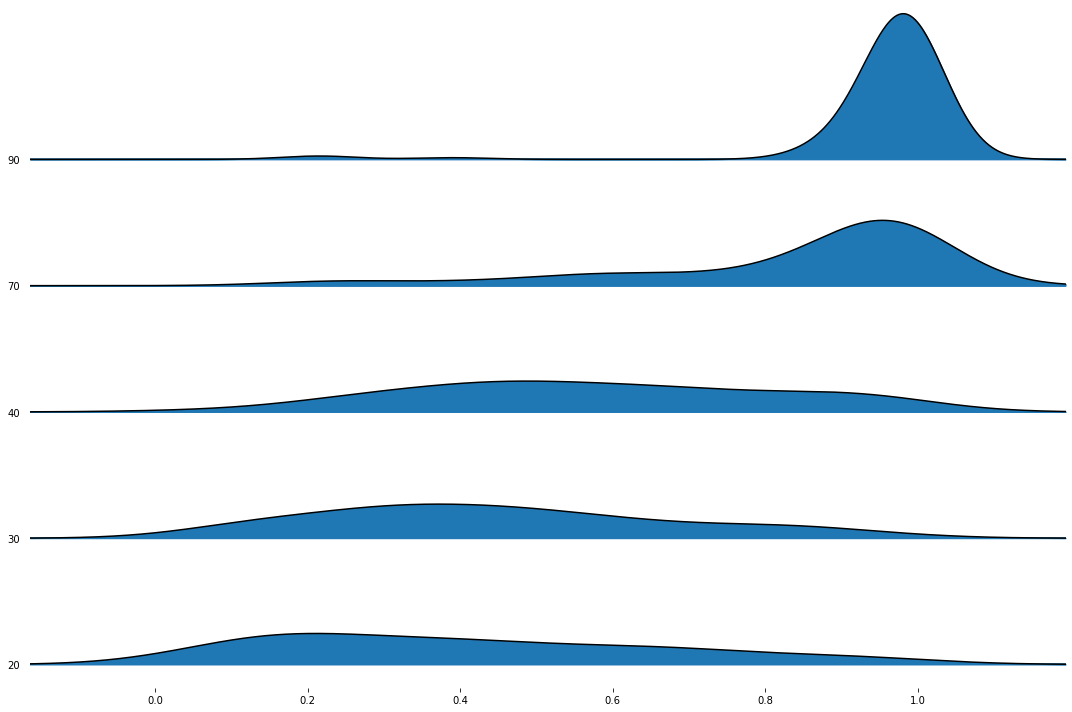

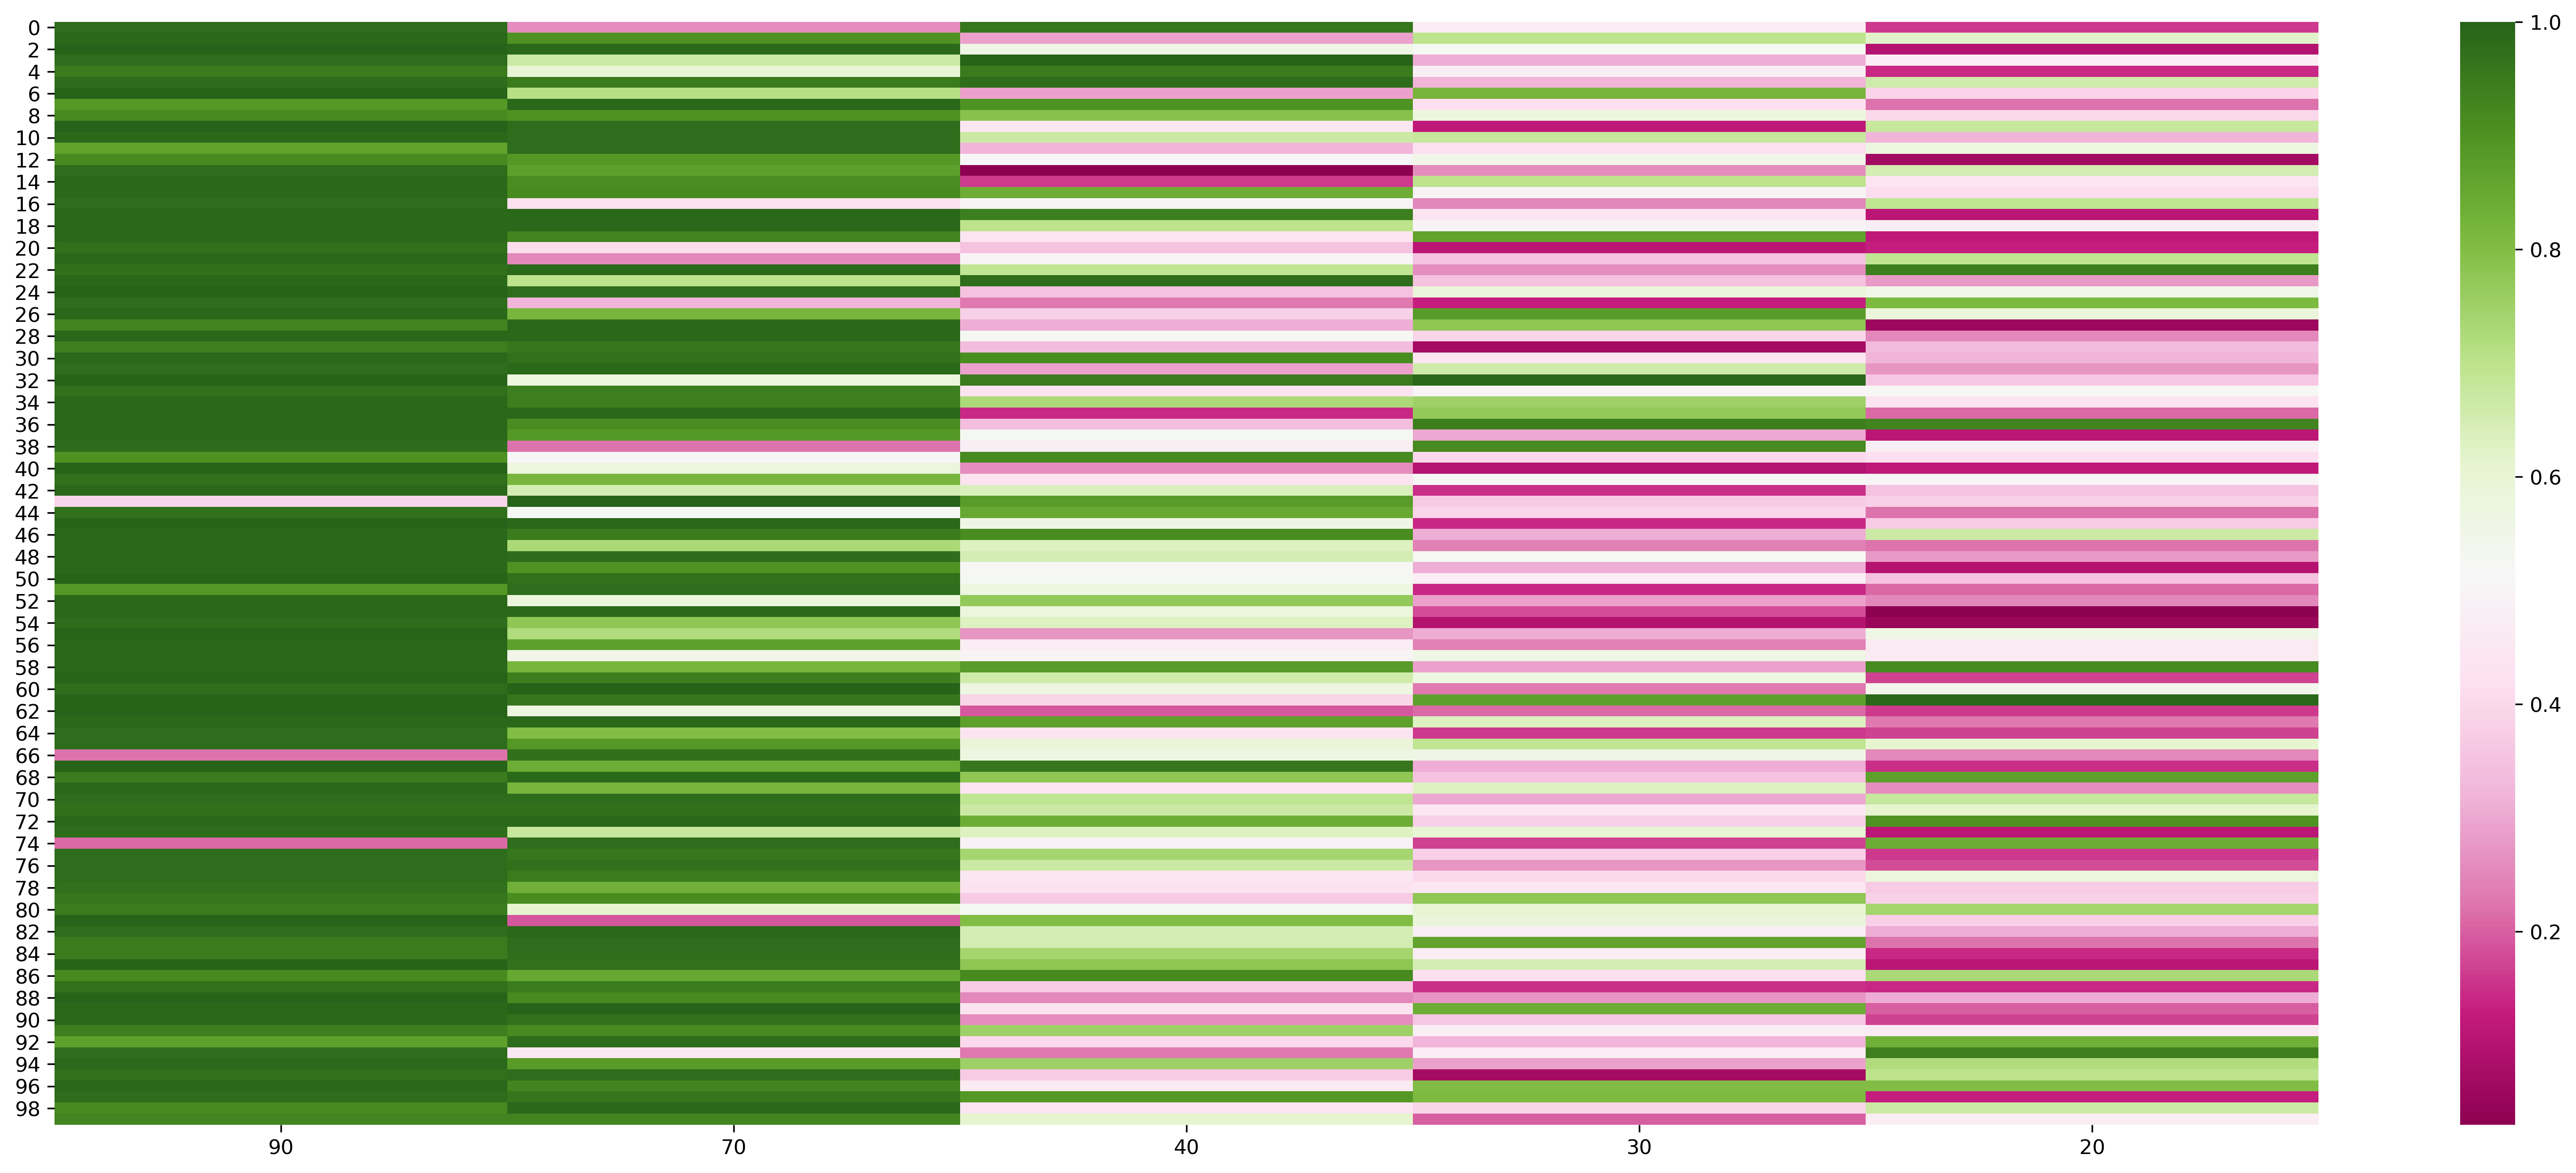

In [7]:
import seaborn as sns

#sns.set_theme()
fig, ax =plt.subplots(3,1,figsize=(15,10))
sns.kdeplot(l90,ax=ax[0])
ax[0].set(xlabel='Coverage of Safety Windows')
sns.histplot(l90,ax=ax[1])
ax[1].set(xlabel='Coverage of Safety Windows')
qqplot(l90, line='s',ax=ax[2])

# shapiro test
stat, p = shapiro(l90)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# fitting distribution
f = Fitter(l90,distributions=['laplace_asymmetric'])
f.fit()
#f.get_best(method = 'sumsquare_error')
[kappa,loc,scale] = f.fitted_param['laplace_asymmetric']
#f.summary()

# joy plots
joypy.joyplot(data_cov,xlim="own",figsize=(15, 10))

# hitmaps
fig = plt.figure(figsize=(25, 10), dpi=300)
sns.heatmap(data_cov,cmap="PiYG")

In [8]:
import csv

data_noi = pd.read_csv('DataBackup/Backup-TX/noise.csv',usecols=['90', '70', '40', '30', '20'],sep=';')

l90 = data_noi['90']
l70 = data_noi['70']
l40 = data_noi['40']
l30 = data_noi['30']
l20 = data_noi['20']

data_noi.columns = ['90', '70', '40', '30', '20']

# anova test
alpha = 0.05
fvalue, pvalue = stats.f_oneway(data_noi['90'],data_noi['70'],data_noi['40'],data_noi['30'],data_noi['20'])
print('ANOVA - ONE WAY TEST')
if pvalue > alpha:
    print('The mean of all distributions is similar (fail to reject H0)')
else:
    print('The mean of all distributions is considerably different (reject H0)')

# kruskal
ff ,pp = stats.kruskal(data_noi['90'],data_noi['70'],data_noi['40'],data_noi['30'],data_noi['20'])

print('KRUSKAL TEST')
if pp > alpha:
    print('The mean of all distributions is similar (fail to reject H0)')
else:
    print('The mean of all distributions is considerably different (reject H0)')

ANOVA - ONE WAY TEST
The mean of all distributions is considerably different (reject H0)
KRUSKAL TEST
The mean of all distributions is considerably different (reject H0)


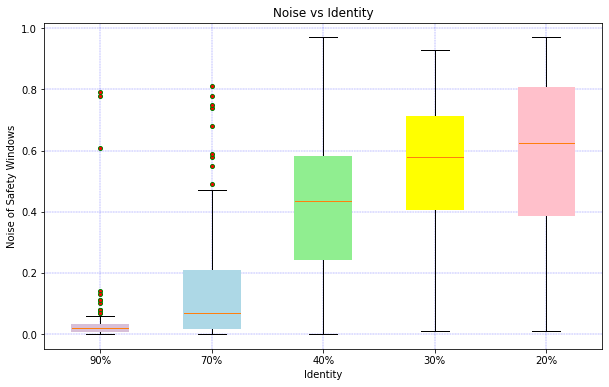

In [9]:
fig= plt.figure(figsize=(10,6))

flierprops = dict(marker='.', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='g')
box_len = plt.boxplot(data_noi,patch_artist=True,flierprops=flierprops)


plt.xticks([1, 2, 3,4,5], ['90%', '70%', '40%','30%','20%'])
plt.xlabel('Identity')
plt.ylabel('Noise of Safety Windows')
plt.title('Noise vs Identity')
plt.grid(color='b', ls = '-.', lw = 0.25)

for i in range(0,len(box_len['boxes'])):
    box_len['boxes'][i].set(color = colors[i],linewidth=2)
    box_len['boxes'][i].set_facecolor(colors[i])
    
fig.savefig('Boxplot_noise_tx.png')

Statistics=0.324, p=0.000
Sample does not look Gaussian (reject H0)


<AxesSubplot:>

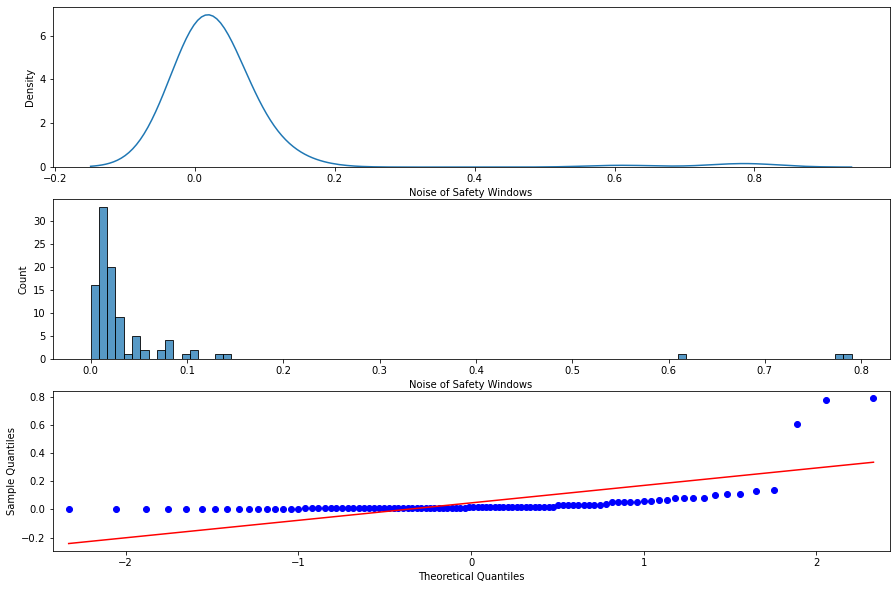

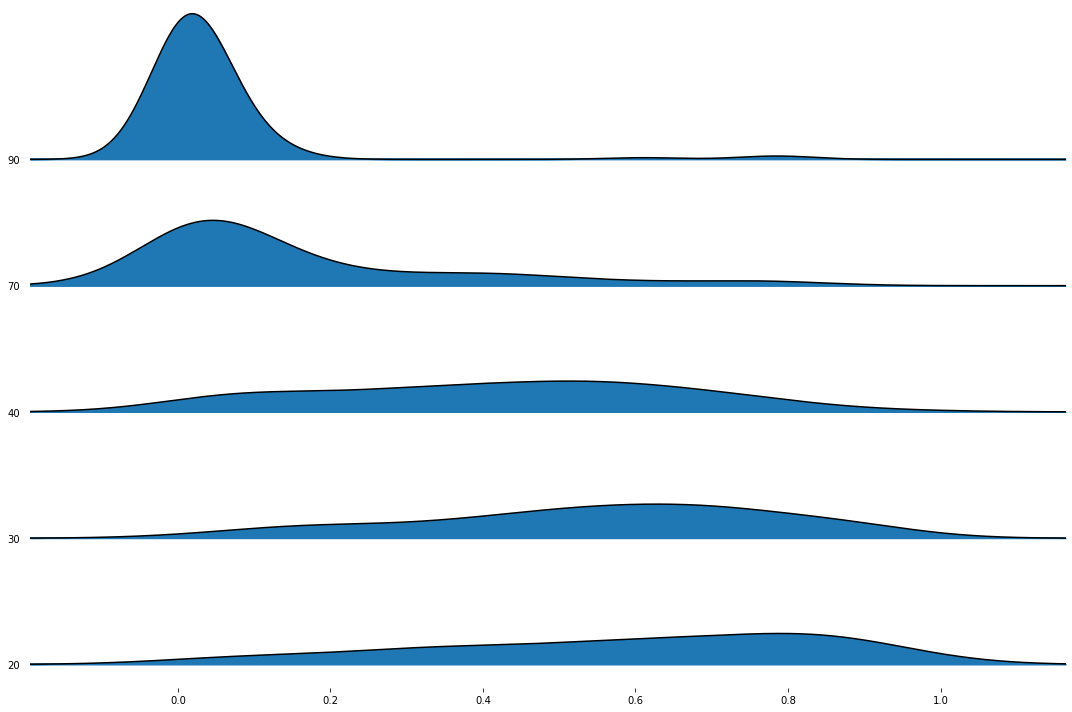

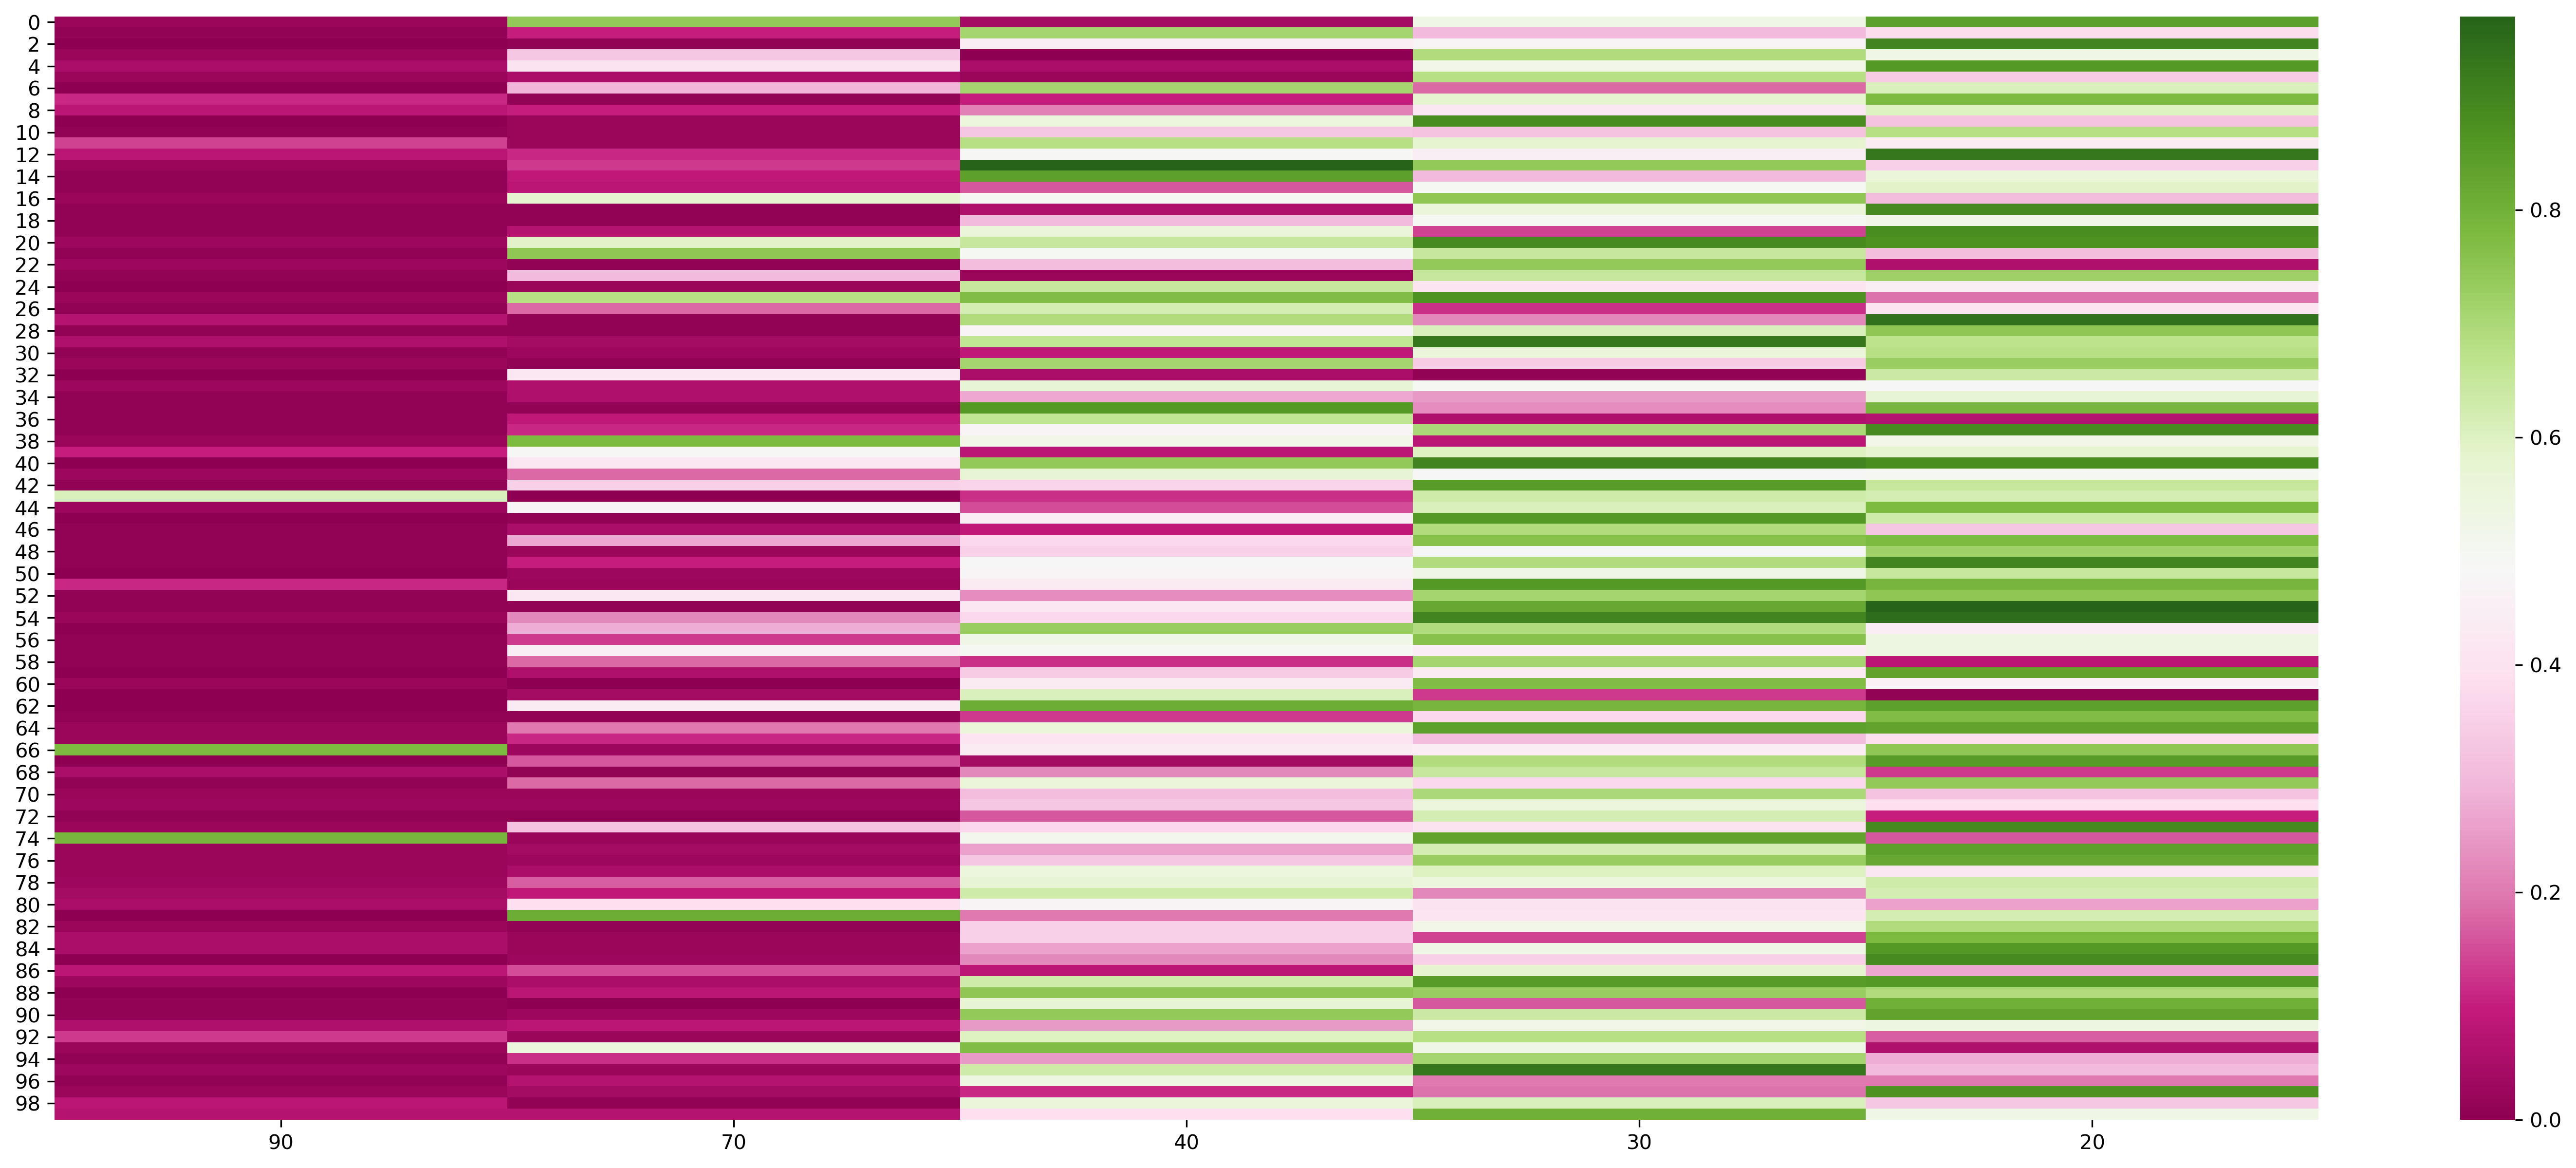

In [10]:
import seaborn as sns

#sns.set_theme()
fig, ax =plt.subplots(3,1,figsize=(15,10))
sns.kdeplot(l90,ax=ax[0])
ax[0].set(xlabel='Noise of Safety Windows')
sns.histplot(l90,ax=ax[1])
ax[1].set(xlabel='Noise of Safety Windows')
qqplot(l90, line='s',ax=ax[2])

# shapiro test
stat, p = shapiro(l90)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# fitting distribution
f = Fitter(l90,distributions=['laplace_asymmetric'])
f.fit()
#f.get_best(method = 'sumsquare_error')
[kappa,loc,scale] = f.fitted_param['laplace_asymmetric']
#f.summary()

# joy plots
joypy.joyplot(data_noi,xlim="own",figsize=(15, 10))

# hitmaps
fig = plt.figure(figsize=(25, 10), dpi=300)
sns.heatmap(data_noi,cmap="PiYG")

In [11]:
import csv

data_nc = pd.read_csv('DataBackup/Backup-TX/nc.csv',usecols=['90', '70', '40', '30', '20'],sep=';')

l90 = data_nc['90']
l70 = data_nc['70']
l40 = data_nc['40']
l30 = data_nc['30']
l20 = data_nc['20']

# anova test
alpha = 0.05
fvalue, pvalue = stats.f_oneway(data_nc['90'],data_nc['70'],data_nc['40'],data_nc['30'],data_nc['20'])
print('ANOVA - ONE WAY TEST')
if pvalue > alpha:
    print('The mean of all distributions is similar (fail to reject H0)')
else:
    print('The mean of all distributions is considerably different (reject H0)')

# kruskal
ff ,pp = stats.kruskal(data_nc['90'],data_nc['70'],data_nc['40'],data_nc['30'],data_nc['20'])

print('KRUSKAL TEST')
if pp > alpha:
    print('The mean of all distributions is similar (fail to reject H0)')
else:
    print('The mean of all distributions is considerably different (reject H0)')

ANOVA - ONE WAY TEST
The mean of all distributions is considerably different (reject H0)
KRUSKAL TEST
The mean of all distributions is considerably different (reject H0)


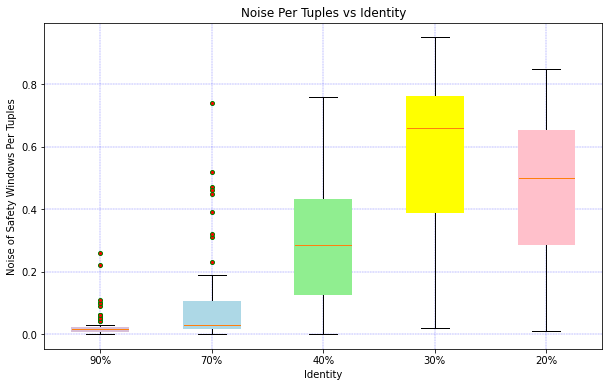

In [12]:
fig= plt.figure(figsize=(10,6))

flierprops = dict(marker='.', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='g')
box_len = plt.boxplot(data_nc,patch_artist=True,flierprops=flierprops)


plt.xticks([1, 2, 3,4,5], ['90%', '70%', '40%','30%','20%'])
plt.xlabel('Identity')
plt.ylabel('Noise of Safety Windows Per Tuples')
plt.title('Noise Per Tuples vs Identity')
plt.grid(color='b', ls = '-.', lw = 0.25)


for i in range(0,len(box_len['boxes'])):
    box_len['boxes'][i].set(color = colors[i],linewidth=2)
    box_len['boxes'][i].set_facecolor(colors[i])
    
fig.savefig('Boxplot_nc_tx.png')

Statistics=0.551, p=0.000
Sample does not look Gaussian (reject H0)


<AxesSubplot:>

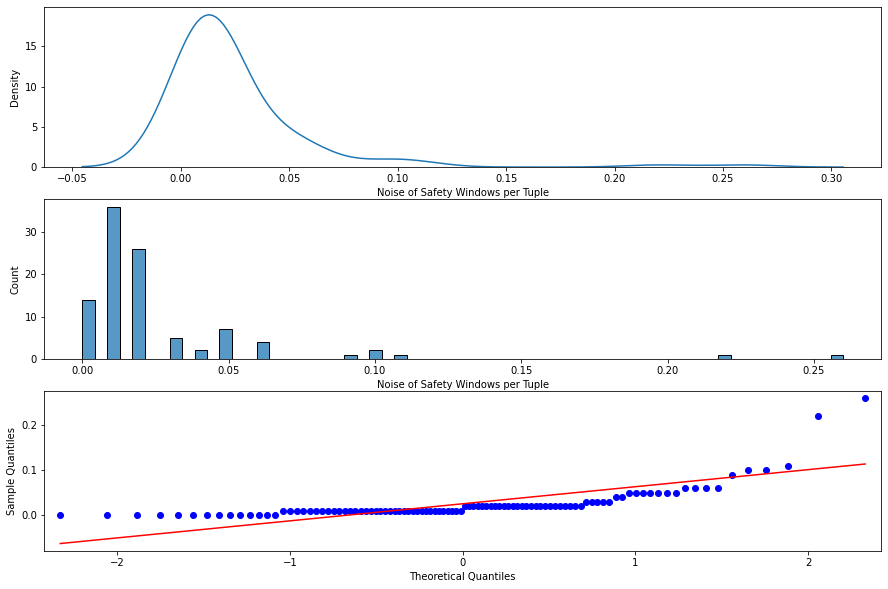

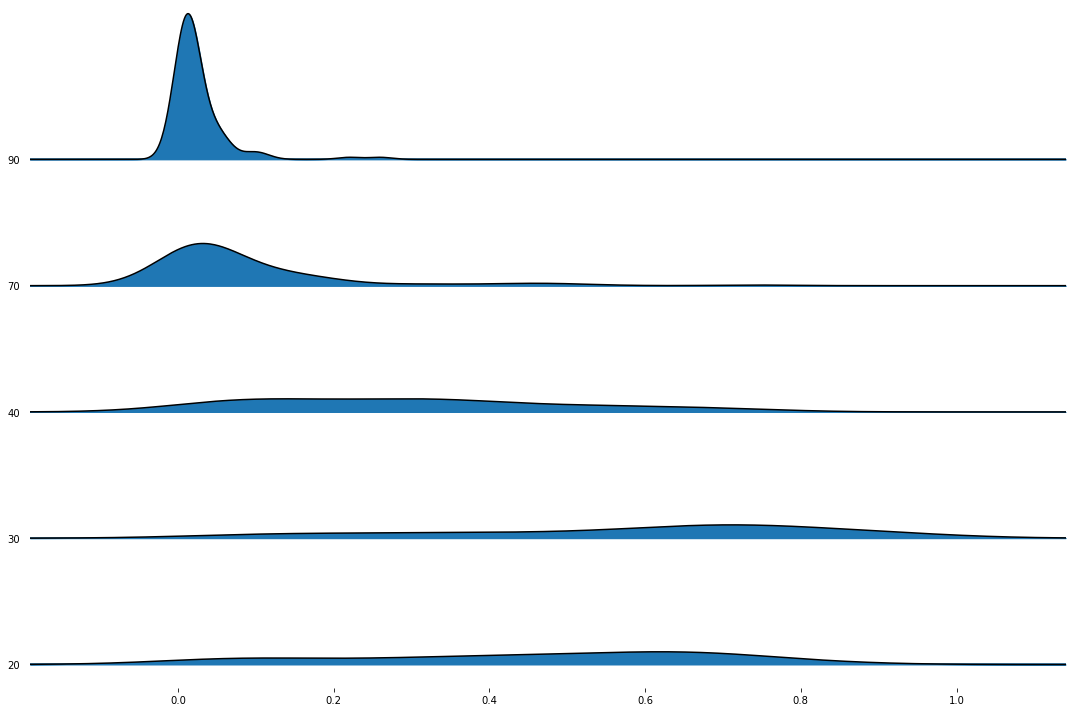

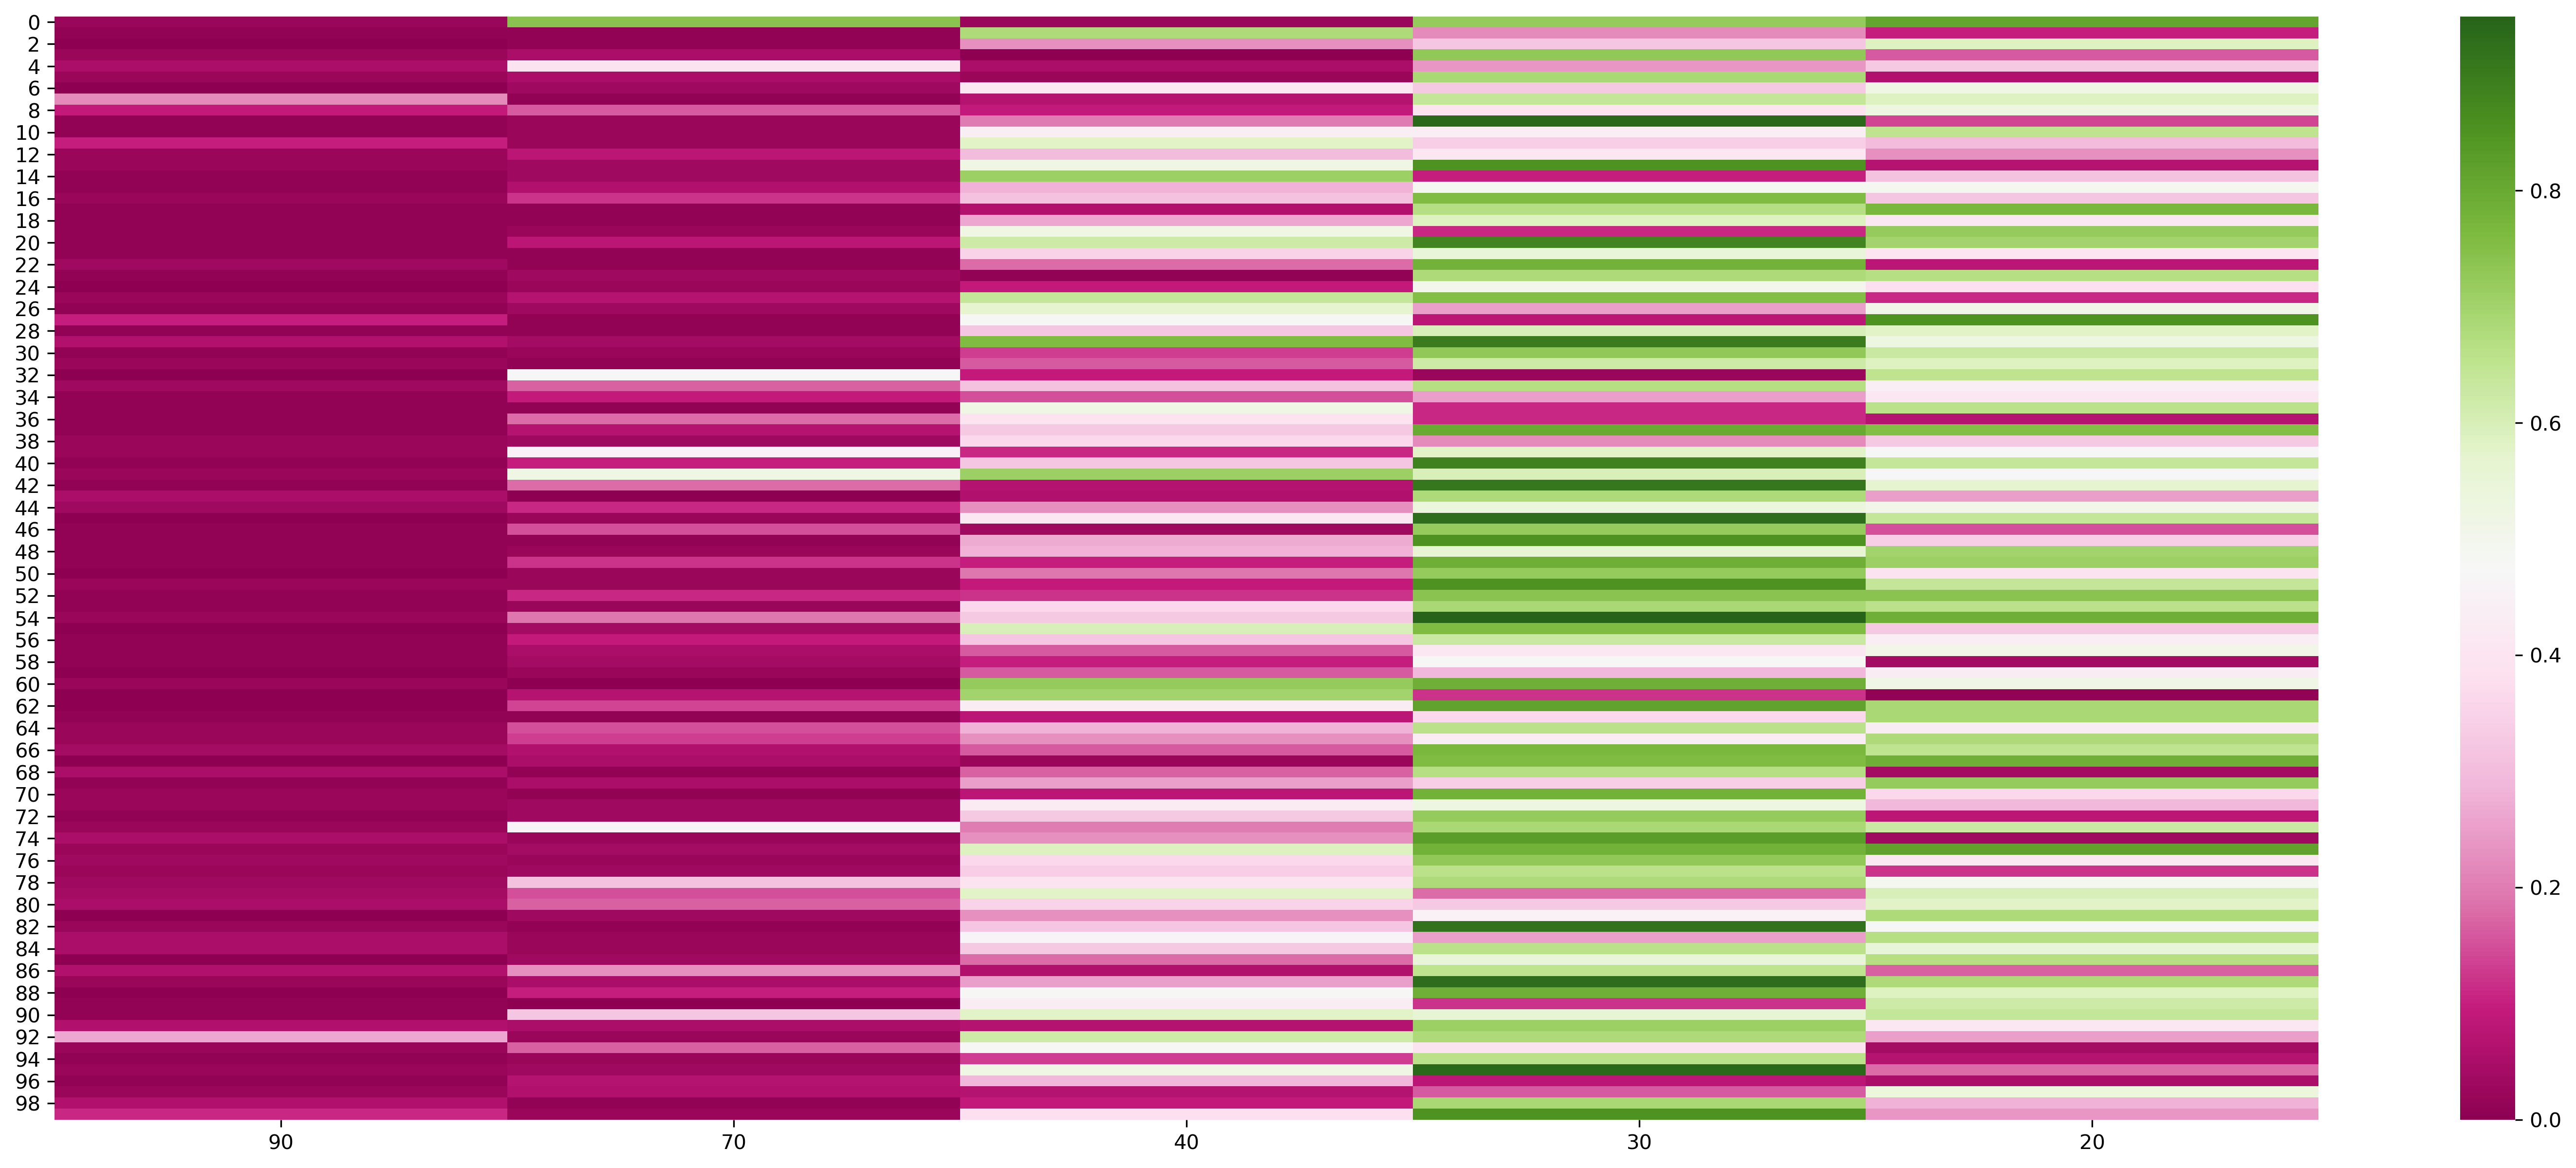

In [13]:
import seaborn as sns

#sns.set_theme()
fig, ax =plt.subplots(3,1,figsize=(15,10))
sns.kdeplot(l90,ax=ax[0])
ax[0].set(xlabel='Noise of Safety Windows per Tuple')
sns.histplot(l90,ax=ax[1])
ax[1].set(xlabel='Noise of Safety Windows per Tuple')
qqplot(l90, line='s',ax=ax[2])

# shapiro test
stat, p = shapiro(l90)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# fitting distribution
f = Fitter(l90,distributions=['laplace_asymmetric'])
f.fit()
#f.get_best(method = 'sumsquare_error')
[kappa,loc,scale] = f.fitted_param['laplace_asymmetric']
#f.summary()

# joy plots
joypy.joyplot(data_nc,xlim="own",figsize=(15, 10))

# hitmaps
fig = plt.figure(figsize=(25, 10), dpi=300)
sns.heatmap(data_nc,cmap="PiYG")

In [14]:
import csv

data_lc = pd.read_csv('DataBackup/Backup-TX/lc.csv',usecols=['90', '70', '40', '30', '20'],sep=';')

l90 = data_lc['90']
l70 = data_lc['70']
l40 = data_lc['40']
l30 = data_lc['30']
l20 = data_lc['20']

# anova test
alpha = 0.05
fvalue, pvalue = stats.f_oneway(data_lc['90'],data_lc['70'],data_lc['40'],data_lc['30'],data_lc['20'])
print('ANOVA - ONE WAY TEST')
if pvalue > alpha:
    print('The mean of all distributions is similar (fail to reject H0)')
else:
    print('The mean of all distributions is considerably different (reject H0)')

# kruskal
ff ,pp = stats.kruskal(data_lc['90'],data_lc['70'],data_lc['40'],data_lc['30'],data_lc['20'])

print('KRUSKAL TEST')
if pp > alpha:
    print('The mean of all distributions is similar (fail to reject H0)')
else:
    print('The mean of all distributions is considerably different (reject H0)')

ANOVA - ONE WAY TEST
The mean of all distributions is considerably different (reject H0)
KRUSKAL TEST
The mean of all distributions is considerably different (reject H0)


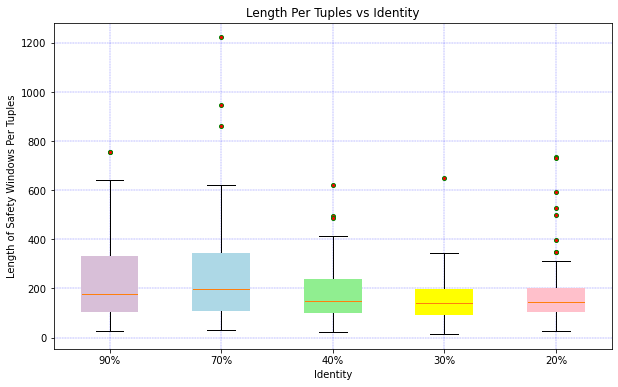

In [15]:
fig= plt.figure(figsize=(10,6))

flierprops = dict(marker='.', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='g')
box_len = plt.boxplot(data_lc,patch_artist=True,flierprops=flierprops)


plt.xticks([1, 2, 3,4,5], ['90%', '70%', '40%','30%','20%'])
plt.xlabel('Identity')
plt.ylabel('Length of Safety Windows Per Tuples')
plt.title('Length Per Tuples vs Identity')
plt.grid(color='b', ls = '-.', lw = 0.25)


for i in range(0,len(box_len['boxes'])):
    box_len['boxes'][i].set(color = colors[i],linewidth=2)
    box_len['boxes'][i].set_facecolor(colors[i])
    
fig.savefig('Boxplot_lc_tx.png')


Statistics=0.894, p=0.000
Sample does not look Gaussian (reject H0)


<AxesSubplot:>

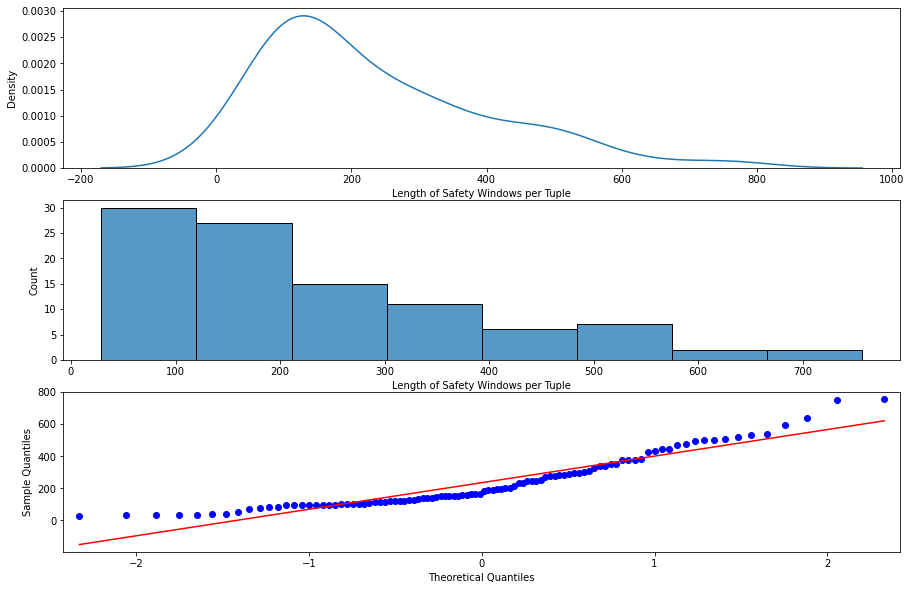

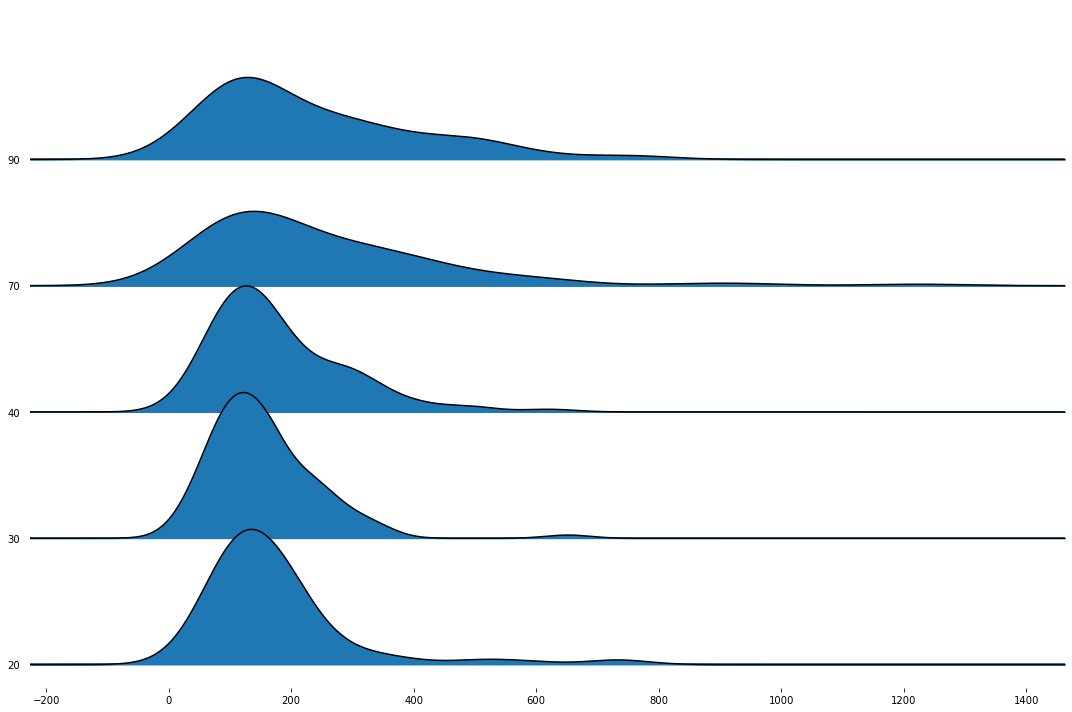

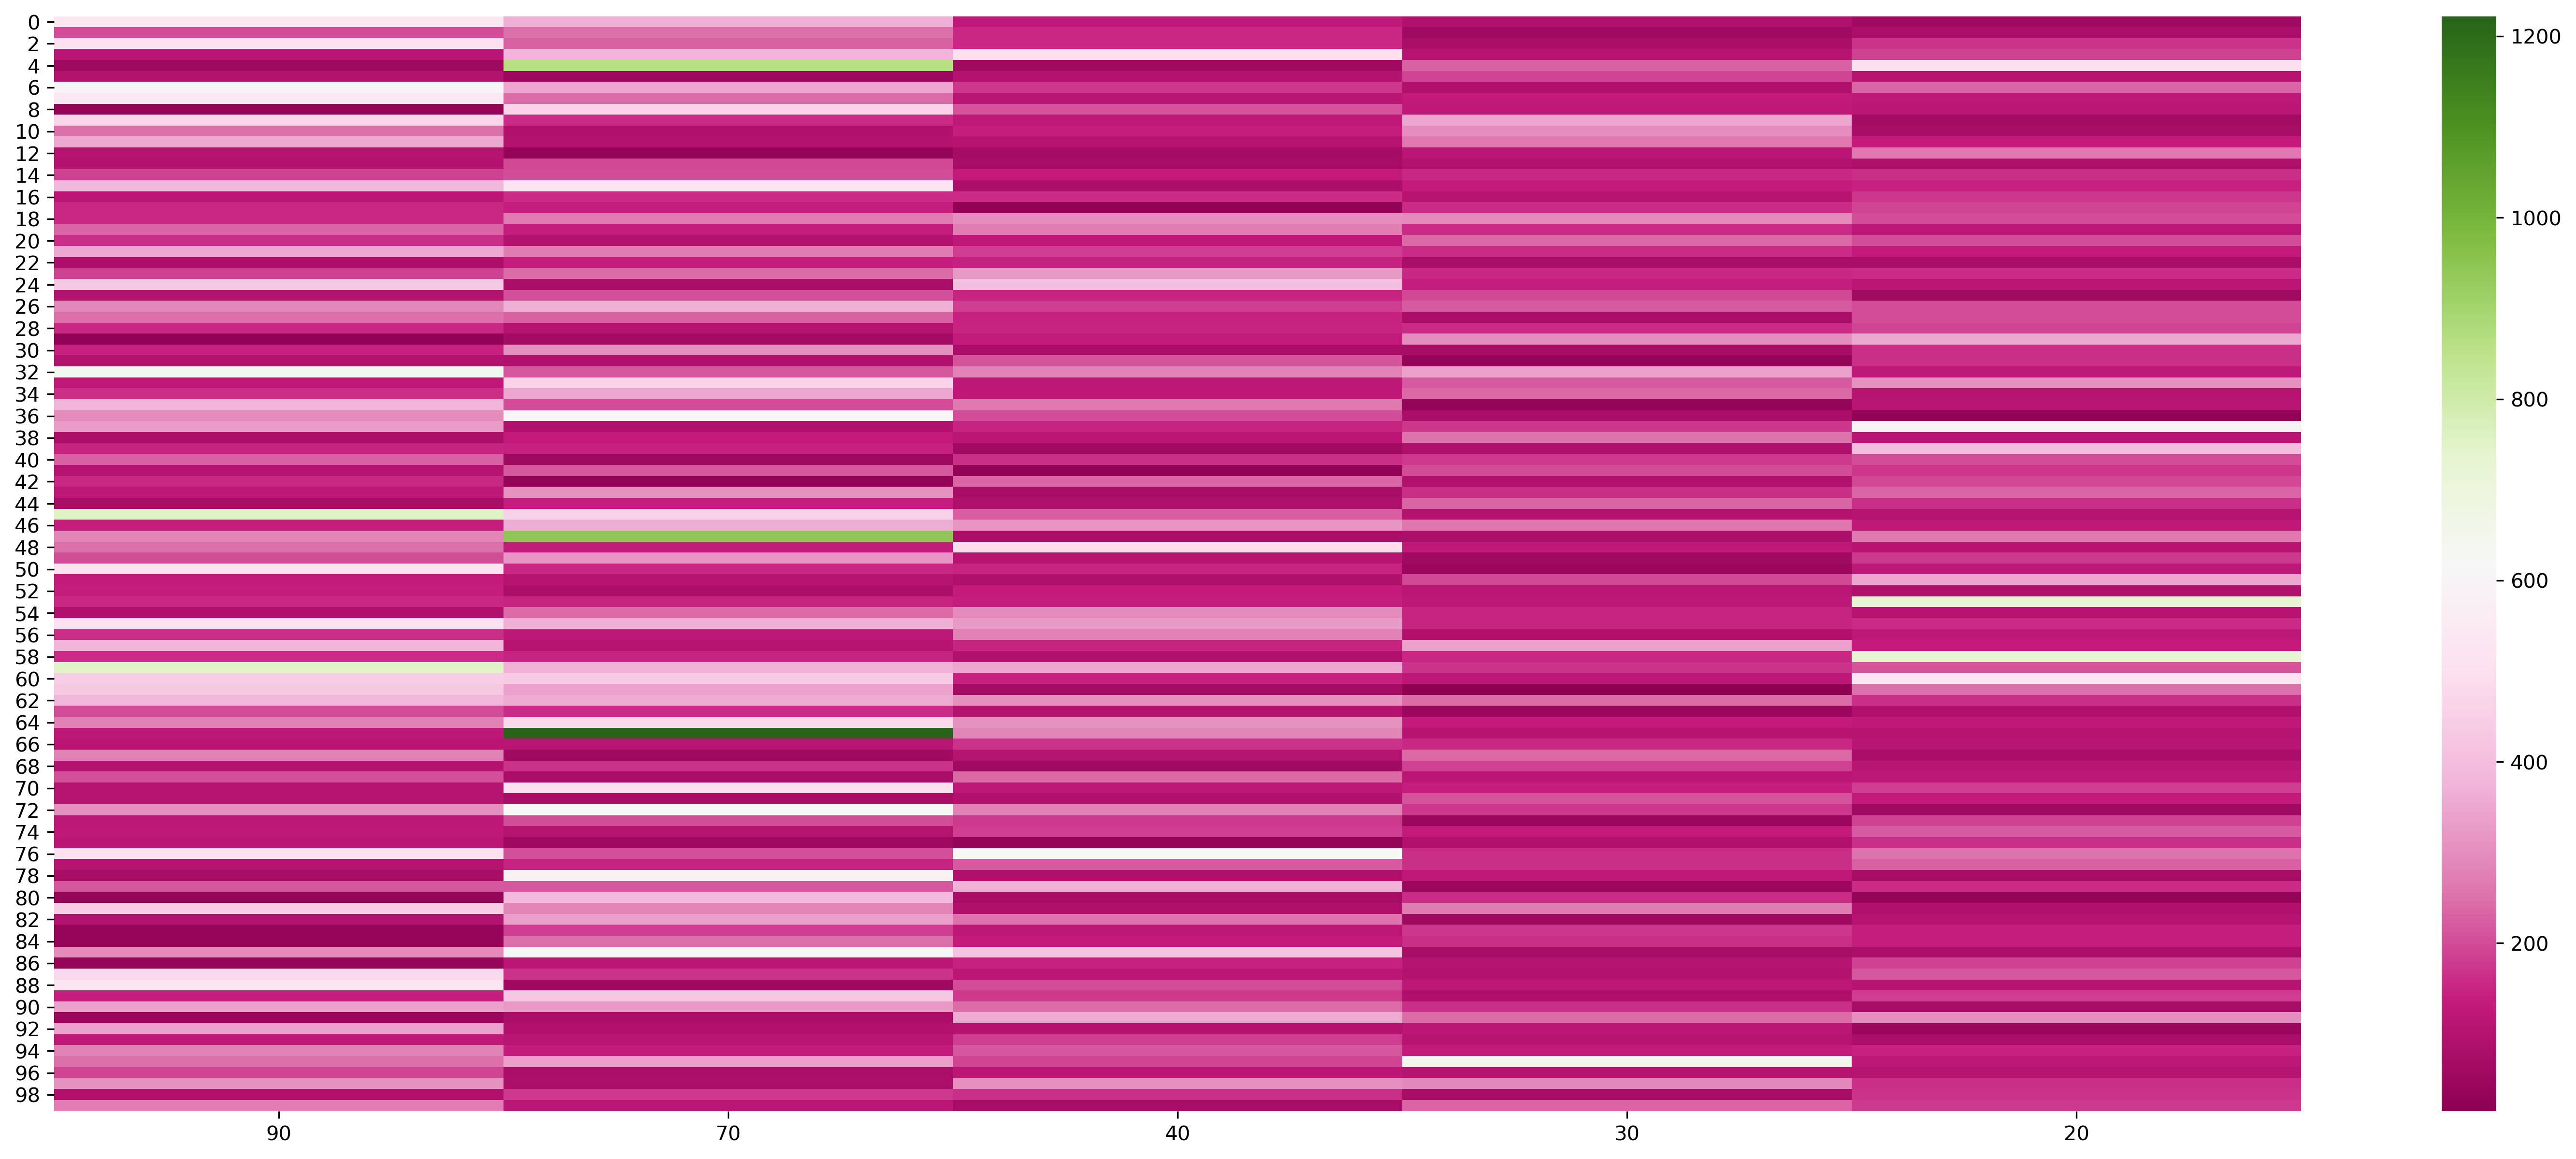

In [16]:
import seaborn as sns

#sns.set_theme()
fig, ax =plt.subplots(3,1,figsize=(15,10))
sns.kdeplot(l90,ax=ax[0])
ax[0].set(xlabel='Length of Safety Windows per Tuple')
sns.histplot(l90,ax=ax[1])
ax[1].set(xlabel='Length of Safety Windows per Tuple')
qqplot(l90, line='s',ax=ax[2])

# shapiro test
stat, p = shapiro(l90)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# fitting distribution
f = Fitter(l90,distributions=['laplace_asymmetric'])
f.fit()
#f.get_best(method = 'sumsquare_error')
[kappa,loc,scale] = f.fitted_param['laplace_asymmetric']
#f.summary()

# joy plots
joypy.joyplot(data_lc,xlim="own",figsize=(15, 10))

# hitmaps
fig = plt.figure(figsize=(25, 10), dpi=300)
sns.heatmap(data_lc,cmap="PiYG")

In [17]:
import csv

data_cc = pd.read_csv('DataBackup/Backup-TX/cc.csv',usecols=['90', '70', '40', '30', '20'],sep=';')

l90 = data_cc['90']
l70 = data_cc['70']
l40 = data_cc['40']
l30 = data_cc['30']
l20 = data_cc['20']

# anova test
alpha = 0.05
fvalue, pvalue = stats.f_oneway(data_cc['90'],data_cc['70'],data_cc['40'],data_cc['30'],data_cc['20'])
print('ANOVA - ONE WAY TEST')
if pvalue > alpha:
    print('The mean of all distributions is similar (fail to reject H0)')
else:
    print('The mean of all distributions is considerably different (reject H0)')

# kruskal
ff ,pp = stats.kruskal(data_cc['90'],data_cc['70'],data_cc['40'],data_cc['30'],data_cc['20'])

print('KRUSKAL TEST')
if pp > alpha:
    print('The mean of all distributions is similar (fail to reject H0)')
else:
    print('The mean of all distributions is considerably different (reject H0)')

ANOVA - ONE WAY TEST
The mean of all distributions is considerably different (reject H0)
KRUSKAL TEST
The mean of all distributions is considerably different (reject H0)


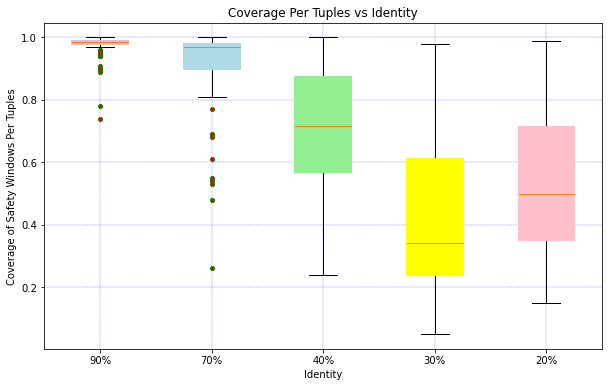

In [18]:
fig= plt.figure(figsize=(10,6))

flierprops = dict(marker='.', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='g')
box_len = plt.boxplot(data_cc,patch_artist=True,flierprops=flierprops)


plt.xticks([1, 2, 3,4,5], ['90%', '70%', '40%','30%','20%'])
plt.xlabel('Identity')
plt.ylabel('Coverage of Safety Windows Per Tuples')
plt.title('Coverage Per Tuples vs Identity')
plt.grid(color='b', ls = '-.', lw = 0.25)


for i in range(0,len(box_len['boxes'])):
    box_len['boxes'][i].set(color = colors[i],linewidth=2)
    box_len['boxes'][i].set_facecolor(colors[i])
    
fig.savefig('Boxplot_cc_tx.png')

Statistics=0.551, p=0.000
Sample does not look Gaussian (reject H0)


<AxesSubplot:>

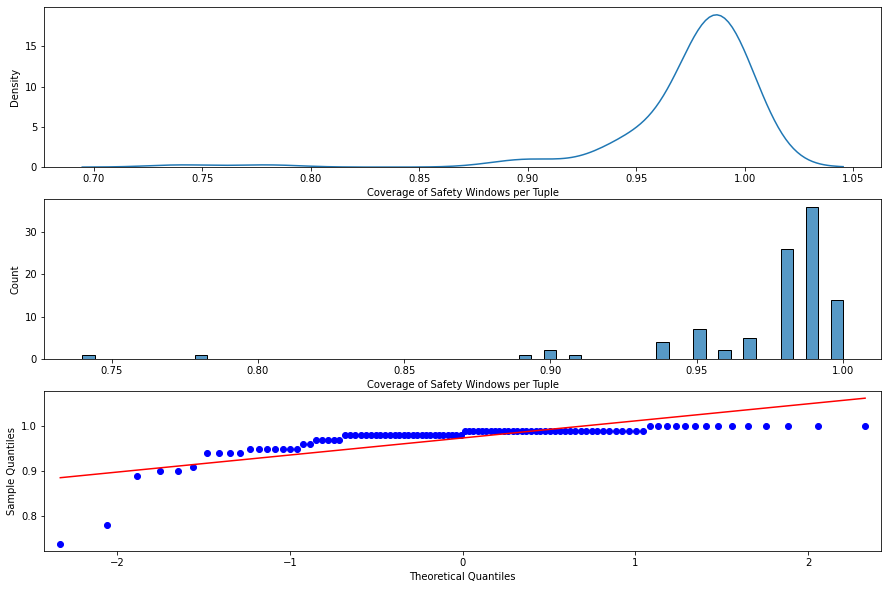

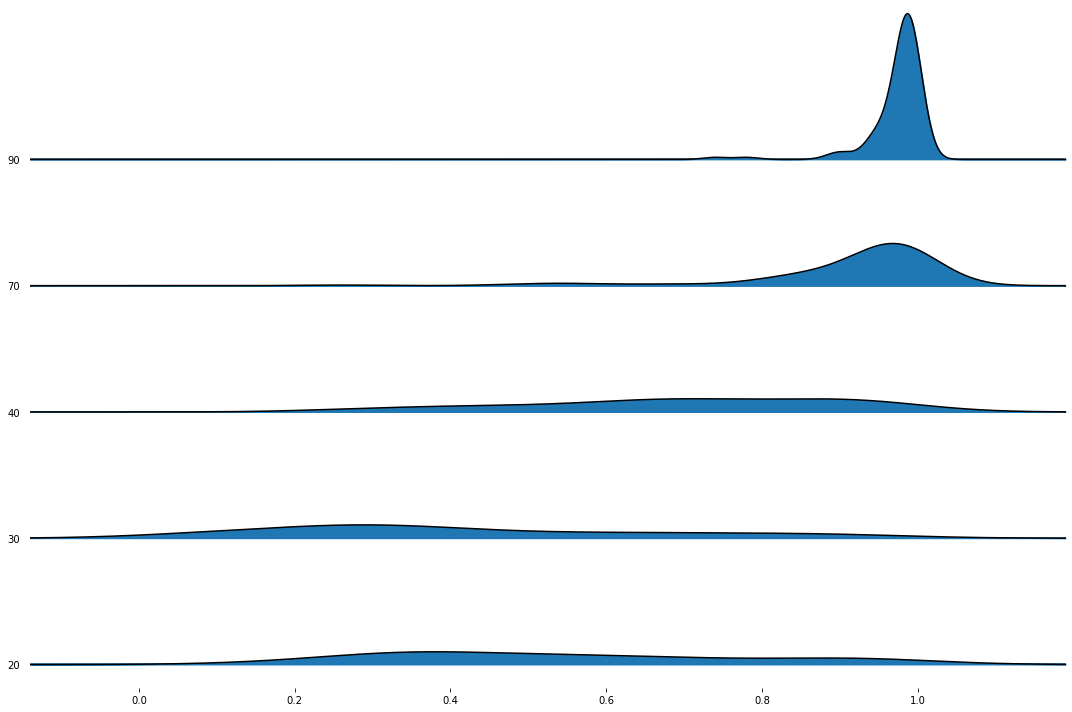

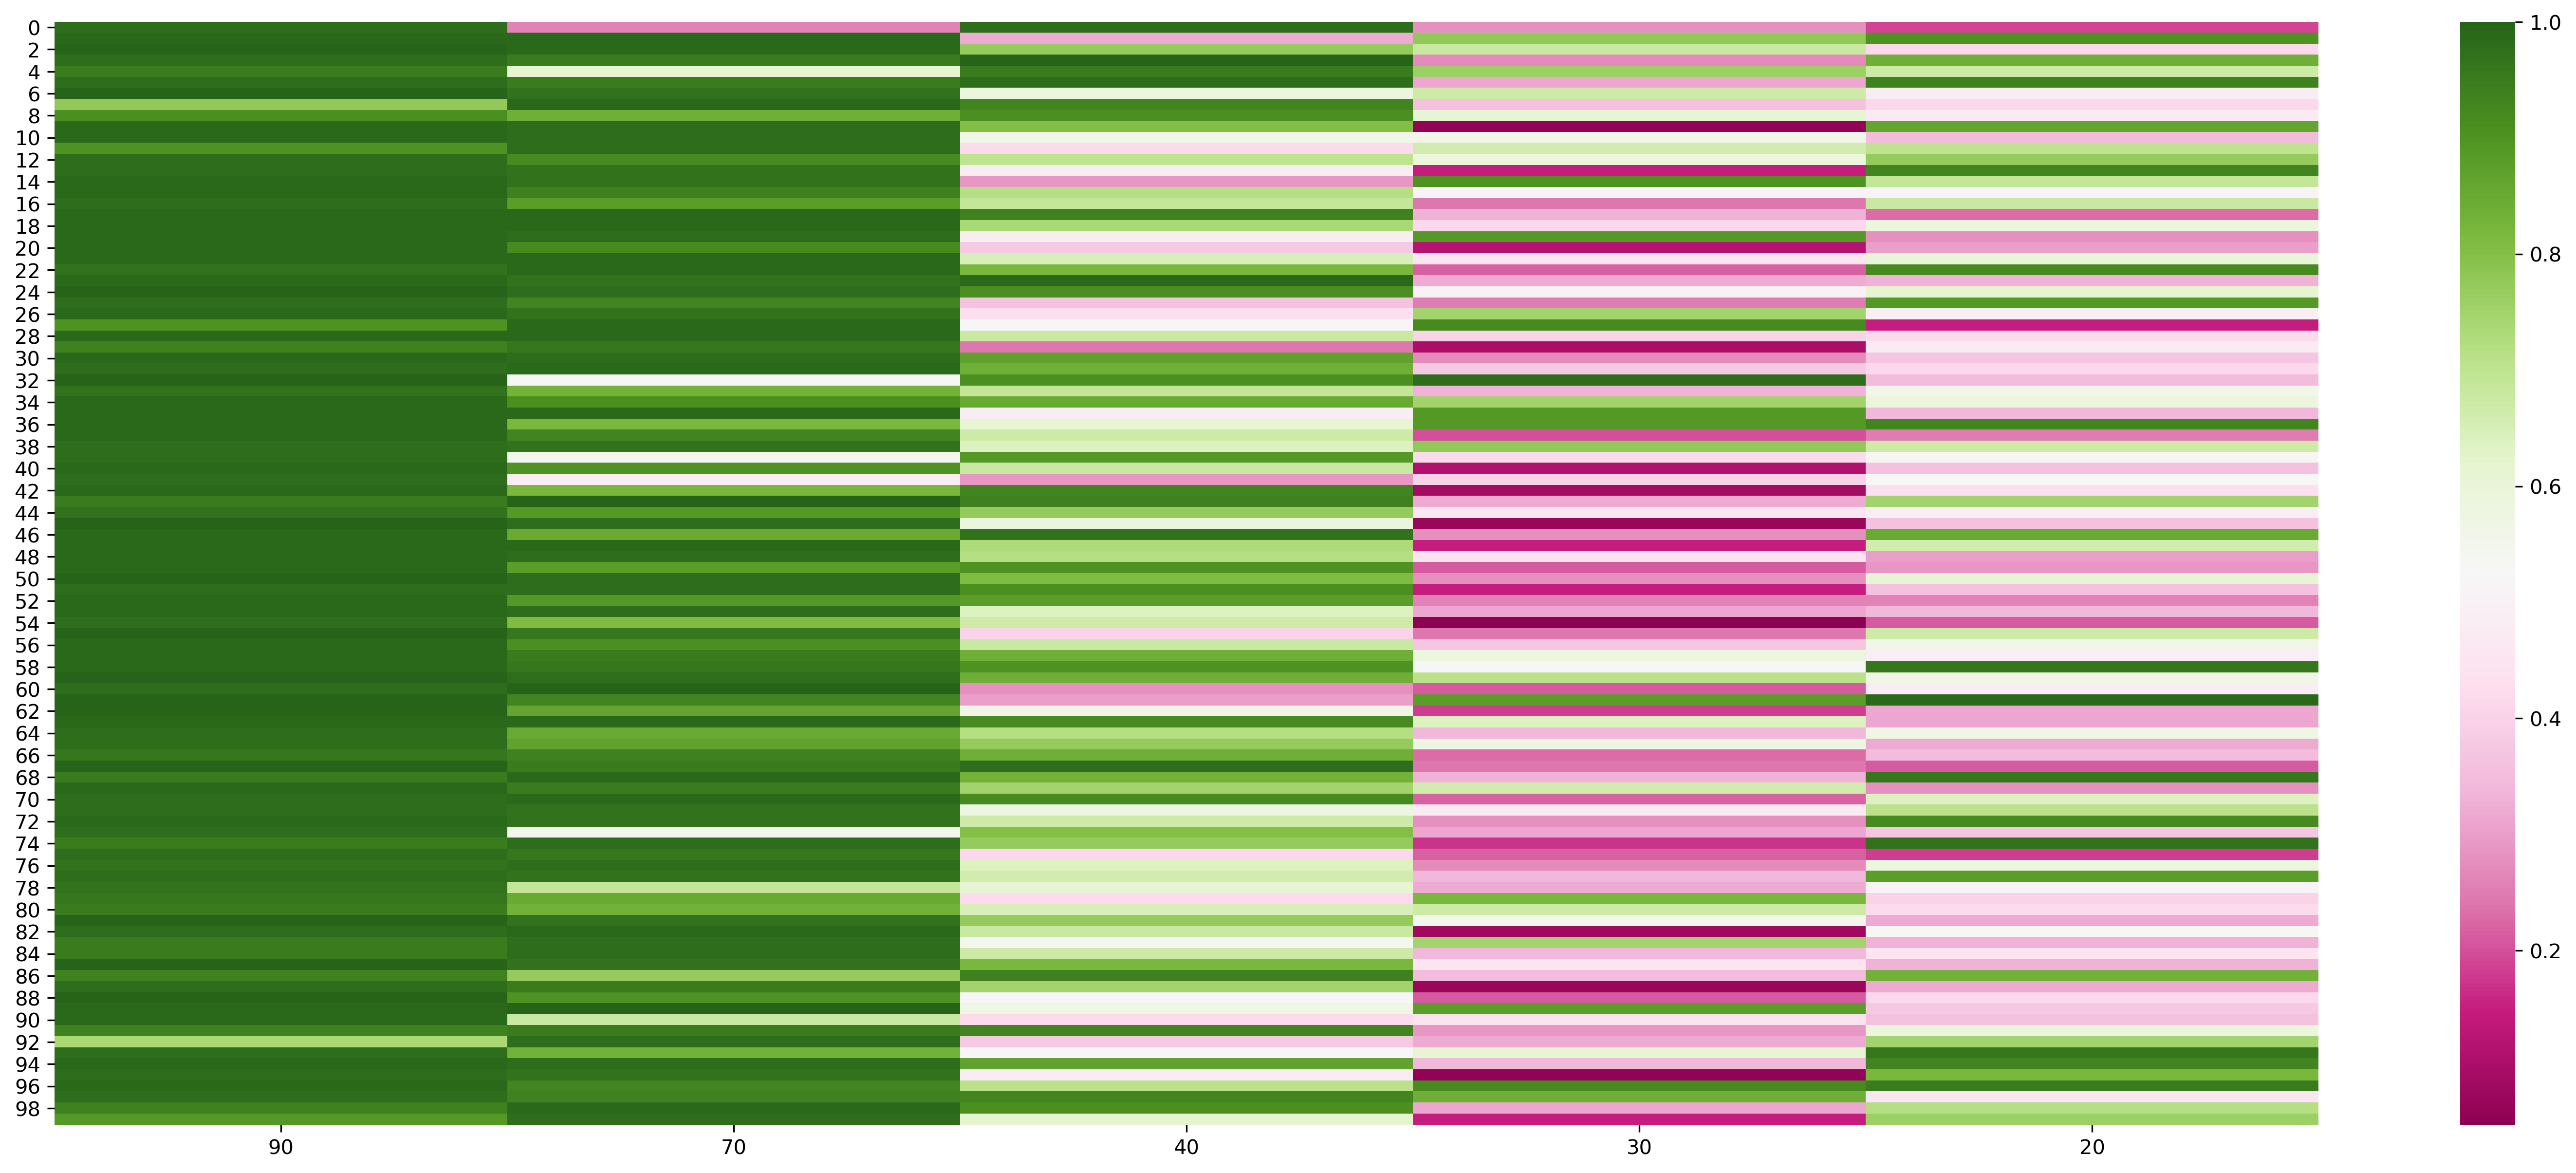

In [19]:
import seaborn as sns

#sns.set_theme()
fig, ax =plt.subplots(3,1,figsize=(15,10))
sns.kdeplot(l90,ax=ax[0])
ax[0].set(xlabel='Coverage of Safety Windows per Tuple')
sns.histplot(l90,ax=ax[1])
ax[1].set(xlabel='Coverage of Safety Windows per Tuple')
qqplot(l90, line='s',ax=ax[2])

# shapiro test
stat, p = shapiro(l90)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# fitting distribution
f = Fitter(l90,distributions=['laplace_asymmetric'])
f.fit()
#f.get_best(method = 'sumsquare_error')
[kappa,loc,scale] = f.fitted_param['laplace_asymmetric']
#f.summary()

# joy plots
joypy.joyplot(data_cc,xlim="own",figsize=(15, 10))

# hitmaps
fig = plt.figure(figsize=(25, 10), dpi=300)
sns.heatmap(data_cc,cmap="PiYG")

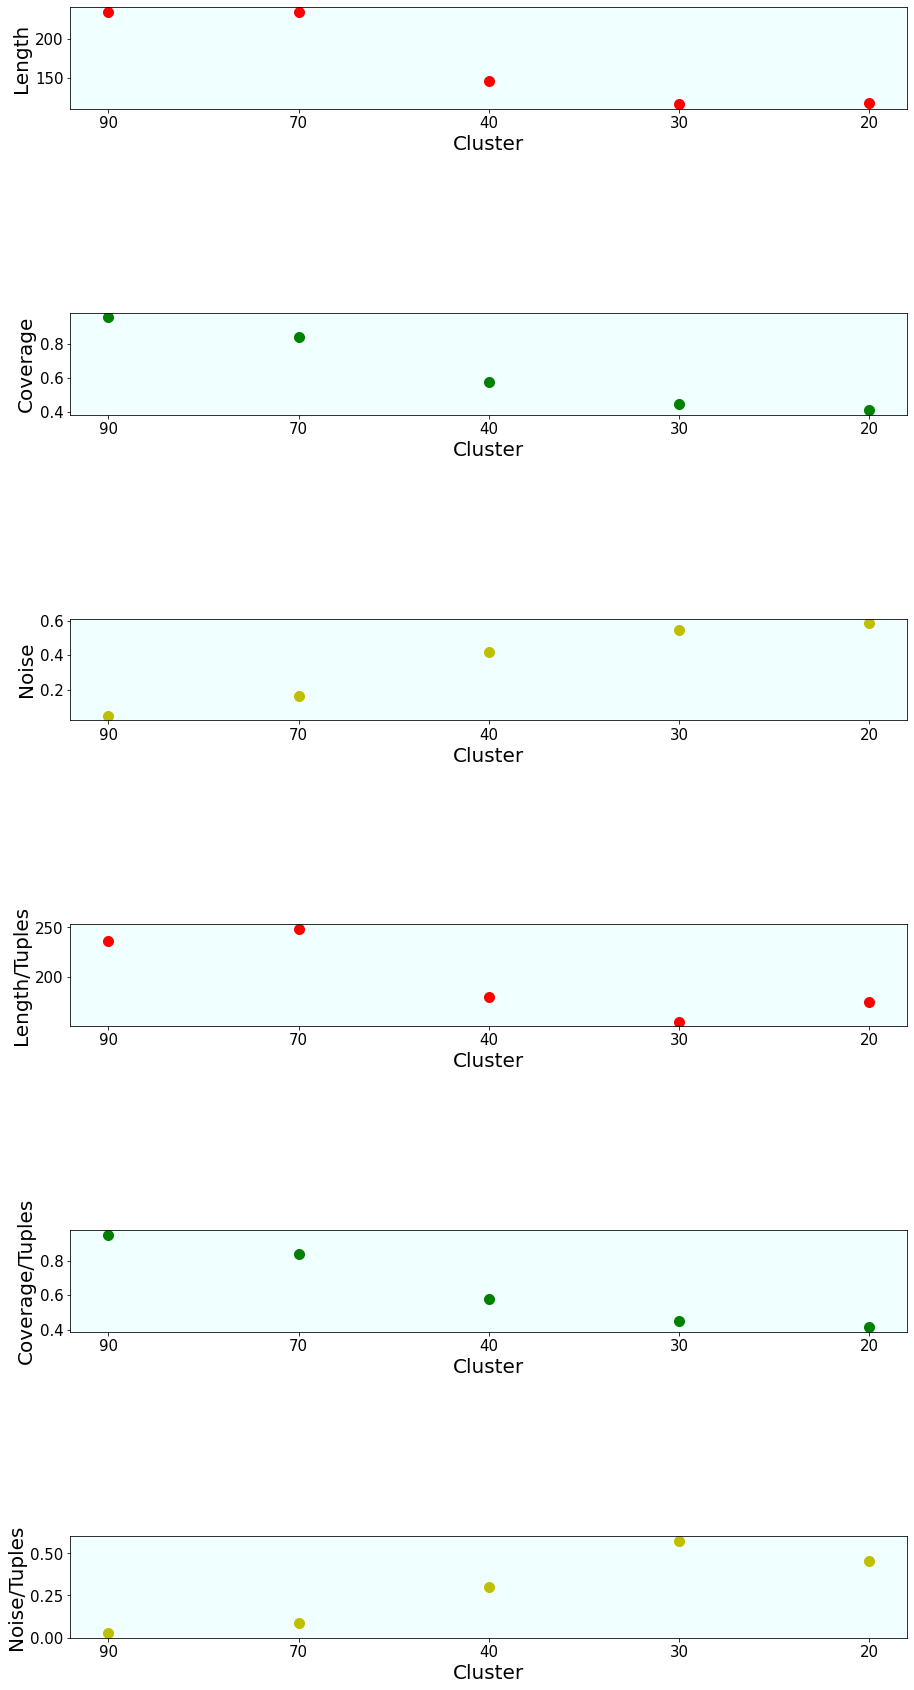

In [23]:
fig, axs = plt.subplots(6,figsize=(15,30))
    
    
length = [st.mean(data_len['90']),st.mean(data_len['70']),st.mean(data_len['40']),st.mean(data_len['30']),st.mean(data_len['20'])]
tuplesCount = range(0,(len(length)))

axs[0].plot(tuplesCount,length,'ro',markersize=10)
axs[0].grid(color='grey',linestyle='solid')
axs[0].set_facecolor('azure')
axs[0].set_xticks(range(5))
axs[0].set_xticklabels(['90','70','40','30','20'])
axs[0].set_xlabel("Cluster",size=20)
axs[0].tick_params(axis='both',labelsize = 15)
axs[0].set_ylabel("Length",size=20)
axs[0].grid(color='grey',linestyle='solid')

plt.subplots_adjust(wspace = 0.8, 
                    hspace=0.8)


cc = [st.mean(data_cov['90']),st.mean(data_cov['70']),st.mean(data_cov['40']),st.mean(data_cov['30']),st.mean(data_cov['20'])]
axs[1].plot(tuplesCount,cc,'go',markersize=10)
axs[1].grid(color='grey',linestyle='solid')
axs[1].set_facecolor('azure')
axs[1].set_xticks(range(5))
axs[1].set_xticklabels(['90','70','40','30','20'])
axs[1].set_xlabel("Cluster",size=20)
axs[1].tick_params(axis='both',labelsize = 15)
axs[1].grid(color='grey',linestyle='solid')
axs[1].set_ylabel("Coverage",size=20)

plt.subplots_adjust(wspace = 0.8, 
                    hspace=0.8)

noise = [st.mean(data_noi['90']),st.mean(data_noi['70']),st.mean(data_noi['40']),st.mean(data_noi['30']),st.mean(data_noi['20'])]
axs[2].plot(tuplesCount,noise,'yo',markersize=10)
axs[2].grid(color='grey',linestyle='solid')
axs[2].set_facecolor('azure')
axs[2].set_xticks(range(5))
axs[2].set_xticklabels(['90','70','40','30','20'])
axs[2].set_xlabel("Cluster",size=20)
axs[2].tick_params(axis='both',labelsize = 15)
axs[2].set_ylabel("Noise",size=20)
axs[2].grid(color='grey',linestyle='solid')

plt.subplots_adjust(wspace = 0.8, 
                    hspace=0.8)


lc = [st.mean(data_lc['90']),st.mean(data_lc['70']),st.mean(data_lc['40']),st.mean(data_lc['30']),st.mean(data_lc['20'])]
axs[3].plot(tuplesCount,lc,'ro',markersize=10)
axs[3].grid(color='grey',linestyle='solid')
axs[3].set_facecolor('azure')
axs[3].set_xticks(range(5))
axs[3].set_xticklabels(['90','70','40','30','20'])
axs[3].set_xlabel("Cluster",size=20)
axs[3].tick_params(axis='both',labelsize = 15)
axs[3].set_ylabel("Length/Tuples",size=20)
axs[3].grid(color='grey',linestyle='solid')

plt.subplots_adjust(wspace = 0.8, 
                    hspace=2.0)

axs[4].plot(tuplesCount,cc,'go',markersize=10)
axs[4].grid(color='grey',linestyle='solid')
axs[4].set_facecolor('azure')
axs[4].set_xticks(range(5))
axs[4].set_xticklabels(['90','70','40','30','20'])
axs[4].set_xlabel("Cluster",size=20)
axs[4].tick_params(axis='both',labelsize = 15)
axs[4].set_ylabel("Coverage/Tuples",size=20)
axs[4].grid(color='grey',linestyle='solid')

plt.subplots_adjust(wspace = 0.8, 
                    hspace=2.0)

nc = [st.mean(data_nc['90']),st.mean(data_nc['70']),st.mean(data_nc['40']),st.mean(data_nc['30']),st.mean(data_nc['20'])]
axs[5].plot(tuplesCount,nc,'yo',markersize=10)
axs[5].grid(color='grey',linestyle='solid')
axs[5].set_facecolor('azure')
axs[5].set_xlabel("Cluster",size=20)
axs[5].set_xticks(range(5))
axs[5].set_xticklabels(['90','70','40','30','20'])
axs[5].tick_params(axis='both',labelsize = 15)
axs[5].set_ylabel("Noise/Tuples",size=20)
axs[5].grid(color='grey',linestyle='solid')

fig.savefig('Averages_Windows_tx.png')

In [21]:
# create boxplots
# try tree things